# Antes de ejecutar este código es importante leer el archivo README de la carpeta.

# Limpieza de datos

## Primero el dataset de logs_entrenamiento:

In [1]:
import pandas as pd

logs_entrenamiento = pd.read_csv('logs_entrenamiento.csv')
chapter = pd.read_csv('map_displayname_to_chap_seq_id.csv')
notas = pd.read_csv('notas.csv')

# Configuración de pandas
pd.set_option('display.max_columns', None) # Que se muestren todas las columnas

Se puede notar que los datos son de los momentos en que una persona interactúa con la página. Existen tipos de interacciones o eventos. Ellos están asociados a una persona, una momento en el tiempo y una sección (chapter) y subsección (sequential) de página.

In [2]:
# Verificamos existencia de NA's
logs_entrenamiento.isna().sum()

Unnamed: 0                0
username                  0
time                      0
event_type                0
grouped_event_type        0
chapter               31911
sequential            31911
label                     0
dtype: int64

Se observa que los NA estan asociados a las variables de chapter y sequential.

In [3]:
logs_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536610 entries, 0 to 536609
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Unnamed: 0          536610 non-null  int64 
 1   username            536610 non-null  object
 2   time                536610 non-null  object
 3   event_type          536610 non-null  object
 4   grouped_event_type  536610 non-null  object
 5   chapter             504699 non-null  object
 6   sequential          504699 non-null  object
 7   label               536610 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 32.8+ MB


In [4]:
# Se busca los grouped_event_type asociados a chapter

valores_unicos = logs_entrenamiento.loc[logs_entrenamiento['chapter'].isna(), 'grouped_event_type'].unique()
print(valores_unicos)

['edx.bi.course.upgrade.sidebarupsell.displayed' 'edx.ui.lms.link_clicked'
 'edx.course.home.resume_course.clicked' 'edx.course.tool.accessed']


In [5]:
# Se busca los grouped_event_type asociados a sequential

valores_unicos = logs_entrenamiento.loc[logs_entrenamiento['sequential'].isna(), 'grouped_event_type'].unique()
print(valores_unicos)

['edx.bi.course.upgrade.sidebarupsell.displayed' 'edx.ui.lms.link_clicked'
 'edx.course.home.resume_course.clicked' 'edx.course.tool.accessed']


Se puede ver que los NA estan asociados a un tipo específico de dato, es decir, es probable que estos NA no se deban a una falta de un dato existente, sino que, el tipo de registro asociado a edx no posee chapter ni sequential. En consecuencia, se decide no eliminar los NA.

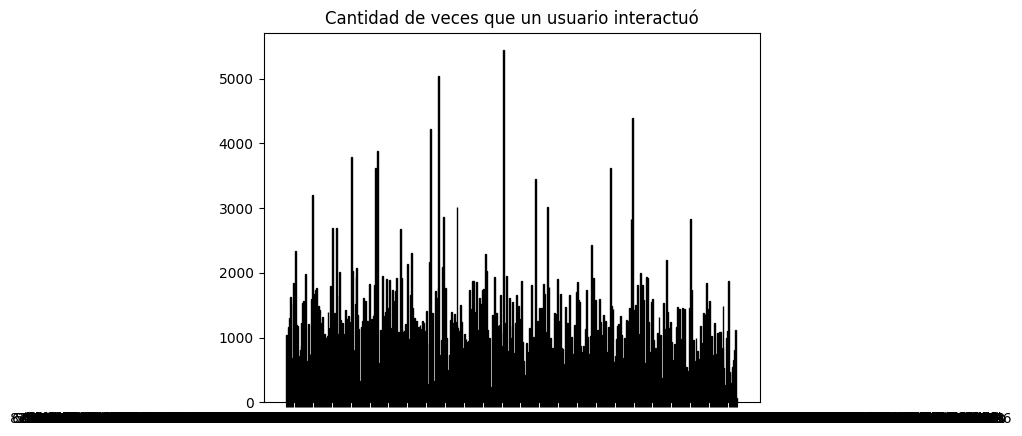

In [6]:
import matplotlib.pyplot as plt

plt.hist(logs_entrenamiento['username'], bins=500, edgecolor='black')  # 'bins' define el número de barras en el histograma

# Personaliza el título y las etiquetas de los ejes
plt.title('Cantidad de veces que un usuario interactuó')

# Muestra el histograma
plt.show()

En la eliminación de outlayers, se debe notar que es posible que aquellas personas que menos interactúan con la página, sean las personas que tienen las peores notas. Por lo tanto, se decide eliminar a los outlayers superiores únicamente.

In [7]:
# Calcula el número mínimo y máximo de registros basados en el 5% más extremo
umbral_minimo = logs_entrenamiento['username'].value_counts().quantile(0.00)
umbral_maximo = logs_entrenamiento['username'].value_counts().quantile(0.90)

# Filtra el DataFrame para eliminar las filas correspondientes
logs_entrenamiento_filtrado = logs_entrenamiento[logs_entrenamiento.groupby('username')['username'].transform('count').between(umbral_minimo, umbral_maximo)]

# Se omite la exportación del csv para este notebook en particular
#logs_entrenamiento_filtrado.to_csv('logs_entrenamiento_filtrado.csv', index=True)

## Ahora el dataset de notas:

In [8]:
# Se modifica Not Atempted por -1
notas = notas.replace('Not Attempted', -1)

for col in notas.columns:
    columnas_listas = ['Unnamed: 0','Username','Grade','Grade Scaled','Quiz (Avg)']
    if col in columnas_listas:
        continue
    
    notas[col] = pd.to_numeric(notas[col], errors='coerce')

In [9]:
# Se verifica que funcionó
notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 34 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0                                         587 non-null    int64  
 1   Username                                           587 non-null    object 
 2   Grade                                              587 non-null    float64
 3   Grade Scaled                                       587 non-null    float64
 4   Quiz 1: Uso de modelos matemáticos en la economía  587 non-null    float64
 5   Quiz 2: Motivación y Función de Producción         587 non-null    float64
 6   Quiz 3: Preferencias y Toma de Decisiones          587 non-null    float64
 7   Quiz 4: Salario y Efectos                          587 non-null    float64
 8   Quiz 5: Explicando Diferencias y Conclusión        587 non-null    float64
 9   Quiz 6: In

In [10]:
# Verificamos existencia de NA's (No hay, se traspasó bien el type object a float)
notas.isna().sum()

Unnamed: 0                                           0
Username                                             0
Grade                                                0
Grade Scaled                                         0
Quiz 1: Uso de modelos matemáticos en la economía    0
Quiz 2: Motivación y Función de Producción           0
Quiz 3: Preferencias y Toma de Decisiones            0
Quiz 4: Salario y Efectos                            0
Quiz 5: Explicando Diferencias y Conclusión          0
Quiz 6: Introducción y conceptos iniciales           0
Quiz 7: Prediciendo el resultado de un juego         0
Quiz 8: Evaluación de Resultados                     0
Quiz 9: Determinación de Asignaciones                0
Quiz 10: Desigualdad                                 0
Quiz 11: Conceptos centrales                         0
Quiz 12: Profundizando lo aprendido                  0
Quiz 13: Conceptos centrales                         0
Quiz 14: Profundizando lo aprendido                  0
Quiz 15: C

In [11]:
# De la revisión del CSV, se observa que Quiz 17 contiene sólo casos 'No Atempted'
notas['Quiz 17: Introducción'].describe()

count    587.0
mean      -1.0
std        0.0
min       -1.0
25%       -1.0
50%       -1.0
75%       -1.0
max       -1.0
Name: Quiz 17: Introducción, dtype: float64

In [12]:
# Eliminamos dicha columna
notas = notas.drop('Quiz 17: Introducción', axis=1)    

# Se observa que las columnas Grade y Grade Scaled contienen la misma información, se decide por querdarse con la original
notas = notas.drop('Grade Scaled',axis=1)

### Tratamiento de outliers

In [13]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

notas_df = notas

# Reemplaza 'Not Attempted' con -1 y convierte las cadenas a flotantes
quiz_columns = [col for col in notas_df.columns if 'Quiz' in col]
notas_df[quiz_columns] = notas_df[quiz_columns].replace('Not Attempted', -1).astype(float)

# Determinamos el número de filas para los subplots
n_rows = (len(quiz_columns) + 1) // 2

# Crear una figura con subplots en dos columnas
fig = make_subplots(rows=n_rows, cols=2, subplot_titles=quiz_columns)

# Añadir un histograma para cada cuestionario en la posición adecuada
for idx, col in enumerate(quiz_columns):
    fig.add_trace(
        go.Histogram(x=notas_df[col], name=col),
        row=(idx // 2) + 1,  # Incrementar la fila después de cada dos cuestionarios
        col=(idx % 2) + 1    # Alternar entre columna 1 y 2
    )

# Actualizar el layout para que se ajuste bien
fig.update_layout(
    height=300 * n_rows,  # Ajustar la altura si es necesario para acomodar todos los subplots
    title_text="Distribución de Puntuaciones por Cuestionario",
    showlegend=False
)

# Mostrar la figura
fig.show()


Al analizar los datos se puede ver que las variables se encuentran distribuidas dentro de rangos esperados, es decir, dentro de (0,1) con valores ocasionales de -1, los cuales son los eventos en que un estudiante decidió no intentar el Quiz.

En el caso excepcional del Quiz 1, se observa una alta tasa de No Atempt, esto se puede deber a que el curso está comenzando y que el primer quiz es sin nota y ademas introductorio a EOL.




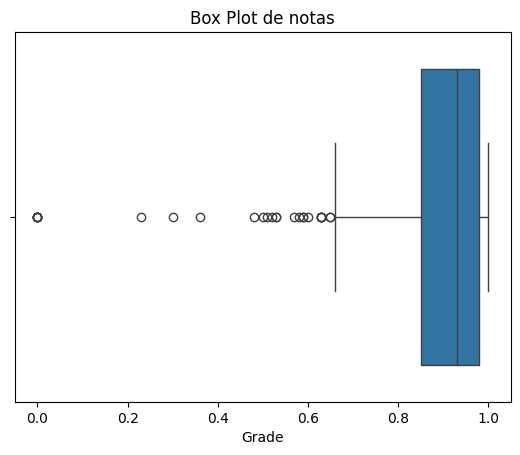

In [14]:
import seaborn as sns

sns.boxplot(x=notas['Grade'])
plt.title('Box Plot de notas')
plt.show()

Se observa que en el agregado de notas, se tiene una fuerte tendencia a centrarse entre el 0.8 y el 1.0, se decide no eliminar aquellos outliers que nunca respondieron ningún quiz, por lo que obtuvieron nota 0. Esto porque pueden contener información de si la persona pertenece a la clase a identificar.

Hay 26 outliers, lo que representa aproximadamente el 4.43% del total de datos.
Los límites para considerar un valor como atípico están dados por:
Límite inferior : 0.655
Límite superior : 1.175
Esto significa que cualquier calificación por debajo de 0.655 se considera un outlier. Dado que la escala de calificaciones no ha sido especificada, asumimos que está entre 0 y 1, donde 1 es la calificación más alta posible.

Las estadísticas descriptivas de los outliers son:

Media (Mean): 0.41, lo que indica que en promedio, los outliers están por debajo del promedio general.
Desviación estándar (Std): 0.25, lo que muestra una variabilidad considerable entre los valores atípicos.
Mínimo (Min): 0.00, la calificación más baja posible, lo que sugiere que algunos estudiantes no obtuvieron ningún punto.
Cuartiles (25%, 50%, 75%): Los valores de los cuartiles indican que la mitad de los outliers tiene calificaciones entre 0.2475 y 0.5975, lo que muestra que no todos los outliers están en el extremo más bajo.
Este pequeño porcentaje de outliers podría representar casos de estudiantes que tuvieron un rendimiento significativamente por debajo del promedio.
A partir de esto consideramos importante no eliminar estos outliers dado que representan personas con baja califacion, por lo cual puede ser importante en el modelo que estas personas sean parte de los datos, para que el modelo tambien aprenda de estos usuarios, que pueden ser parte importante de los que reprobaron el ramo.

A partir de los outliers encontrados en logs entrenamiento, los quitamos del dataframe de notas

In [15]:
# Obtenemos los usuarios del df filtrados
usernames_filtrados = set(logs_entrenamiento_filtrado['username'].unique())
len(usernames_filtrados)

385

In [16]:
# Obtenemos los usuarios del df sin filtrar
logs_entrenamiento = pd.read_csv('logs_entrenamiento.csv')
usernames_sin_filtrar = set(logs_entrenamiento['username'].unique())
len(usernames_sin_filtrar)

428

In [17]:
usernames_diferencia = usernames_sin_filtrar - usernames_filtrados
# Obtenemos los usuarios que fueron eliminados, es decir, los outliers del logs entrenamiento
len(usernames_diferencia)

43

In [18]:
notas_df_filtrado = notas_df[~notas_df['Username'].isin(usernames_diferencia)]
len(notas_df_filtrado)

544

# Cruce de los datos y generación de variables

In [19]:
eventos = logs_entrenamiento_filtrado.copy()

notas = notas_df_filtrado.copy()

column_names_df = notas.columns


column_names_eventos = eventos.columns

# Print the column names
print("Column names of 'df':", column_names_df)
print("Column names of 'eventos':", column_names_eventos)

# Rename a single column
notas.rename(columns={'Username': 'username'}, inplace=True)

notas.head()

Column names of 'df': Index(['Unnamed: 0', 'Username', 'Grade',
       'Quiz 1: Uso de modelos matemáticos en la economía',
       'Quiz 2: Motivación y Función de Producción',
       'Quiz 3: Preferencias y Toma de Decisiones',
       'Quiz 4: Salario y Efectos',
       'Quiz 5: Explicando Diferencias y Conclusión',
       'Quiz 6: Introducción y conceptos iniciales',
       'Quiz 7: Prediciendo el resultado de un juego',
       'Quiz 8: Evaluación de Resultados',
       'Quiz 9: Determinación de Asignaciones', 'Quiz 10: Desigualdad',
       'Quiz 11: Conceptos centrales', 'Quiz 12: Profundizando lo aprendido',
       'Quiz 13: Conceptos centrales', 'Quiz 14: Profundizando lo aprendido',
       'Quiz 15: Conceptos centrales', 'Quiz 16: Profundizando lo aprendido',
       'Quiz 18: Oferta, demanda y equilibrio de mercado',
       'Quiz 19: Cambios en la oferta y la demanda',
       'Quiz 20: Excedentes y la mano invisible',
       'Quiz 21: Impuestos y Subsidios',
       'Quiz 22: Efic

,Unnamed: 0,username,Grade,Quiz 1: Uso de modelos matemáticos en la economía,Quiz 2: Motivación y Función de Producción,Quiz 3: Preferencias y Toma de Decisiones,Quiz 4: Salario y Efectos,Quiz 5: Explicando Diferencias y Conclusión,Quiz 6: Introducción y conceptos iniciales,Quiz 7: Prediciendo el resultado de un juego,Quiz 8: Evaluación de Resultados,Quiz 9: Determinación de Asignaciones,Quiz 10: Desigualdad,Quiz 11: Conceptos centrales,Quiz 12: Profundizando lo aprendido,Quiz 13: Conceptos centrales,Quiz 14: Profundizando lo aprendido,Quiz 15: Conceptos centrales,Quiz 16: Profundizando lo aprendido,"Quiz 18: Oferta, demanda y equilibrio de mercado",Quiz 19: Cambios en la oferta y la demanda,Quiz 20: Excedentes y la mano invisible,Quiz 21: Impuestos y Subsidios,Quiz 22: Eficiencia y externalidades,Quiz 23: Corrección de fallas,Quiz 24: Otras fuentes de ineficiencia,Quiz 25: Regla de la mayoría,Quiz 26: La paradoja de Condorcet,Quiz 27: Teorema del votante mediano,Quiz 28: Decisiones intertemporales,Quiz 29: Tópicos Adicionales,Quiz (Avg)
0,3,05743498d061bf472df897f1e5bdda6d62e99312c952e3...,0.94,0.75,1.0,1.0,1.0,0.0,1.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.905172
1,4,2fb73a5b451fa1beba6a7e6c86cf66ab3d8bfa3fc256bb...,1.00,1.00,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.965517
2,5,c5f32ddce577c3f4cce3bcdcb5c8e0e03933b5cc62fa18...,0.99,1.00,1.0,1.0,1.0,1.0,1.0,0.75,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.956897
3,6,81528304670b5be911641ecc2ba3a21195234d10c3ab43...,1.00,1.00,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.965517
4,7,4427f64ffb5a05abefc1aa6936fca72e2f8fc24ad5f11d...,0.91,-1.00,1.0,1.0,1.0,1.0,1.0,0.75,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.439655


In [20]:
#RENOMBRAMOS COLUMNAS
notas.rename(columns={'Grade': 'grade', 'Grade Scaled': 'grade_scaled', 'Quiz (Avg)': 'quiz_avg', 'Unnamed: 0': 'unnamed'}, inplace=True)


#QUIZZES DE LAS SEQ
# Agrupar los datos por 'chap_order' e imprimir los valores únicos de 'display_name' para cada grupo
grouped = chapter.groupby('seq_order')['display_name'].unique()

for chap_order, unique_display_names in grouped.items():
    display(f'Group {chap_order}: {unique_display_names}')

"Group 0: ['Quiz 2: Motivación y Función de Producción'\n 'Quiz 6: Introducción y conceptos iniciales'\n 'Quiz 8: Evaluación de Resultados' 'Quiz 17: Introducción'\n 'Quiz 25: Regla de la mayoría']"

"Group 1: ['Quiz 1: Uso de modelos matemáticos en la economía'\n 'Quiz 3: Preferencias y Toma de Decisiones'\n 'Quiz 7: Prediciendo el resultado de un juego'\n 'Quiz 9: Determinación de Asignaciones' 'Quiz 11: Conceptos centrales'\n 'Quiz 13: Conceptos centrales' 'Quiz 15: Conceptos centrales'\n 'Quiz 18: Oferta, demanda y equilibrio de mercado'\n 'Quiz 22: Eficiencia y externalidades'\n 'Quiz 26: La paradoja de Condorcet' 'Quiz 28: Decisiones intertemporales']"

"Group 2: ['Quiz 4: Salario y Efectos' 'Quiz 10: Desigualdad'\n 'Quiz 12: Profundizando lo aprendido'\n 'Quiz 14: Profundizando lo aprendido'\n 'Quiz 16: Profundizando lo aprendido'\n 'Quiz 19: Cambios en la oferta y la demanda'\n 'Quiz 23: Corrección de fallas' 'Quiz 27: Teorema del votante mediano'\n 'Quiz 29: Tópicos Adicionales']"

"Group 3: ['Quiz 5: Explicando Diferencias y Conclusión'\n 'Quiz 20: Excedentes y la mano invisible'\n 'Quiz 24: Otras fuentes de ineficiencia']"

"Group 4: ['Quiz 21: Impuestos y Subsidios']"

En esta parte se encuentran aquellos quizzes que pertenecen a un mismo valor de la columna sequential, luego de agruparlos se les toma el promedio y luego se eliminan las columnas originales.

In [21]:
# Se convierten las columnas a tipo numérico
columns_to_convert_seq_0 = ['Quiz 2: Motivación y Función de Producción',
                            'Quiz 6: Introducción y conceptos iniciales',
                            'Quiz 8: Evaluación de Resultados', 
                            'Quiz 25: Regla de la mayoría']

notas[columns_to_convert_seq_0] = notas[columns_to_convert_seq_0].apply(pd.to_numeric, errors='coerce')

# Calcular el promedio para las columnas
notas['seq_0_avg'] = notas[columns_to_convert_seq_0].mean(axis=1)

# Eliminar las columnas originales
notas.drop(columns=columns_to_convert_seq_0, inplace=True)

# Repetir los pasos anteriores para las demás columnas
columns_to_convert_seq_1 = ['Quiz 1: Uso de modelos matemáticos en la economía',
                            'Quiz 3: Preferencias y Toma de Decisiones',
                            'Quiz 7: Prediciendo el resultado de un juego',
                            'Quiz 9: Determinación de Asignaciones',
                            'Quiz 11: Conceptos centrales',
                            'Quiz 13: Conceptos centrales',
                            'Quiz 15: Conceptos centrales',
                            'Quiz 18: Oferta, demanda y equilibrio de mercado',
                            'Quiz 22: Eficiencia y externalidades',
                            'Quiz 26: La paradoja de Condorcet',
                            'Quiz 28: Decisiones intertemporales']

notas[columns_to_convert_seq_1] = notas[columns_to_convert_seq_1].apply(pd.to_numeric, errors='coerce')

notas['seq_1_avg'] = notas[columns_to_convert_seq_1].mean(axis=1)
notas.drop(columns=columns_to_convert_seq_1, inplace=True)



# For seq_2
columns_to_convert_seq_2 = ['Quiz 4: Salario y Efectos', 'Quiz 10: Desigualdad',
                            'Quiz 12: Profundizando lo aprendido',
                            'Quiz 14: Profundizando lo aprendido',
                            'Quiz 16: Profundizando lo aprendido',
                            'Quiz 19: Cambios en la oferta y la demanda',
                            'Quiz 23: Corrección de fallas',
                            'Quiz 27: Teorema del votante mediano',
                            'Quiz 29: Tópicos Adicionales']

notas[columns_to_convert_seq_2] = notas[columns_to_convert_seq_2].apply(pd.to_numeric, errors='coerce')

notas['seq_2_avg'] = notas[columns_to_convert_seq_2].mean(axis=1)
notas.drop(columns=columns_to_convert_seq_2, inplace=True)

# For seq_3
columns_to_convert_seq_3 = ['Quiz 5: Explicando Diferencias y Conclusión',
                            'Quiz 20: Excedentes y la mano invisible',
                            'Quiz 24: Otras fuentes de ineficiencia']

notas[columns_to_convert_seq_3] = notas[columns_to_convert_seq_3].apply(pd.to_numeric, errors='coerce')

notas['seq_3_avg'] = notas[columns_to_convert_seq_3].mean(axis=1)
notas.drop(columns=columns_to_convert_seq_3, inplace=True)


notas.rename(columns={'Quiz 21: Impuestos y Subsidios': 'seq_4_avg'}, inplace=True)

notas.head(10)

,unnamed,username,grade,seq_4_avg,quiz_avg,seq_0_avg,seq_1_avg,seq_2_avg,seq_3_avg
0,3,05743498d061bf472df897f1e5bdda6d62e99312c952e3...,0.94,1.0,0.905172,1.000,0.977273,0.944444,0.666667
1,4,2fb73a5b451fa1beba6a7e6c86cf66ab3d8bfa3fc256bb...,1.00,1.0,0.965517,1.000,1.000000,1.000000,1.000000
2,5,c5f32ddce577c3f4cce3bcdcb5c8e0e03933b5cc62fa18...,0.99,1.0,0.956897,1.000,0.977273,1.000000,1.000000
3,6,81528304670b5be911641ecc2ba3a21195234d10c3ab43...,1.00,1.0,0.965517,1.000,1.000000,1.000000,1.000000
4,7,4427f64ffb5a05abefc1aa6936fca72e2f8fc24ad5f11d...,0.91,-1.0,0.439655,0.500,-0.113636,-0.111111,-0.333333
5,8,afca888290f061f966a5f4ab433b53ac73734e00bdfce6...,0.79,1.0,0.758621,0.500,0.636364,0.555556,0.333333
6,9,95ee01a5a7e3c41023fc379d6acb0f47860f2149caacb1...,0.85,-1.0,0.818966,1.000,0.795455,0.777778,0.333333
7,10,61d11a14e95e598a883d48aea410c474ca6f419ee8a5b0...,0.88,1.0,0.850690,0.625,0.909091,0.907778,1.000000
8,12,4f824a96d26c45a3e047fd26f1f164371e86b4cab53895...,0.80,1.0,0.773103,1.000,0.795455,0.518889,0.666667
9,13,ef14776d7e8bc0b6ad12b59d9b12e2d742e962dfc415b0...,0.95,1.0,0.913793,1.000,0.772727,1.000000,1.000000


En el siguiente chunk de código se define que una sesión corresponde a un día con registro de ingreso. Con esto se calcula el promedio de la duración de las sesiones, la desviación estándar de la duración de las sesiones y la duración en días del uso de EOL, es decir, la diferencia en días entre su último día utilizando la plataforma y el primero.

In [22]:
#ACÁ SE TOMA INFO DE LOG_TRAIN PARA SUPLIR LA DATA DE NOTAS


# Convert the 'time_column' to a datetime object
eventos['time'] = pd.to_datetime(eventos['time'])

# Create new columns for month, day, and time
eventos['month'] = eventos['time'].dt.month
eventos['day'] = eventos['time'].dt.day
eventos['hora'] = eventos['time'].dt.strftime('%H:%M:%S')




#----------------------------------

# DURACION DE SESIONES (una sesion es un día con registro de ingreso)

# Group the DataFrame by 'usuario', 'month', and 'day' and calculate the min and max time
grouped = eventos.groupby(['username', 'month', 'day'])['time'].agg(['min', 'max']).reset_index()

#
grouped['time_difference'] = (grouped['max'] - grouped['min']).dt.total_seconds() / 3600

# Merge the 'time_difference' column from the 'grouped' DataFrame into the 'eventos' DataFrame
eventos = eventos.merge(grouped[['username', 'month', 'day', 'time_difference']], on=['username', 'month', 'day'], how='left')



#----------------------------------

#ESTADISTICOS DE DUACION DE SESIONES

# Group the DataFrame by 'usuarioname' and calculate the average and standard deviation of 'time_difference'
grouped = eventos.groupby('username')['time_difference'].agg(['mean', 'std']).reset_index()

# Rename the columns for clarity
grouped.columns = ['username', 'duracion_sesion_avg', 'duracion_sesion_std']

#Agregarlo a la data final
notas = notas.merge(grouped[['username', 'duracion_sesion_avg', 'duracion_sesion_std']].drop_duplicates(), on='username', how='left')



#----------------------------------

#DURACION EN DÍAS DE SU USO DE EOL

# Extract the date part
eventos['date'] = eventos['time'].dt.date

# Group the DataFrame by 'usuario', 'month', and 'day' and calculate the min and max time
grouped = eventos.groupby(['username'])['date'].agg(['min', 'max']).reset_index()

# Calculate the time difference in hours
grouped['duracion_EOL'] = (grouped['max'] - grouped['min']).dt.days

#Agregarlo a la data final
notas = notas.merge(grouped[['username', 'duracion_EOL']].drop_duplicates(), on='username', how='left')


column_names = notas.columns.tolist()

print(column_names)

['unnamed', 'username', 'grade', 'seq_4_avg', 'quiz_avg', 'seq_0_avg', 'seq_1_avg', 'seq_2_avg', 'seq_3_avg', 'duracion_sesion_avg', 'duracion_sesion_std', 'duracion_EOL']


En el siguiente chunk de código se calculan el número de sesiones que se realizan por mes.

In [23]:

#----------------------------------

#FRECUENCIA DE SESIONES POR MES


distinct_months = eventos['month'].unique()

# Create a new dataframe to store the results
result_data = {'username': eventos['username']}
for month in distinct_months:
    result_data[month] = eventos['username'].map(
        eventos[eventos['month'] == month].groupby('username')['day'].nunique()
    )

# Convert the dictionary to a DataFrame
result_df = pd.DataFrame(result_data)

# Rename multiple columns
result_df.rename(columns={8: 'num_sesiones_agosto', 9: 'num_sesiones_septiembre', 10: 'num_sesiones_octubre'}, inplace=True)


result_df.fillna(0, inplace=True)

# Merge the 'result_df' with the 'df_notas' dataframe based on the 'username' column
notas = notas.merge(result_df, on='username', how='left')

notas

,unnamed,username,grade,seq_4_avg,quiz_avg,seq_0_avg,seq_1_avg,seq_2_avg,seq_3_avg,duracion_sesion_avg,duracion_sesion_std,duracion_EOL,num_sesiones_agosto,num_sesiones_septiembre,num_sesiones_octubre
0,3,05743498d061bf472df897f1e5bdda6d62e99312c952e3...,0.94,1.0,0.905172,1.0,0.977273,0.944444,0.666667,NaN,NaN,NaN,NaN,NaN,NaN
1,4,2fb73a5b451fa1beba6a7e6c86cf66ab3d8bfa3fc256bb...,1.00,1.0,0.965517,1.0,1.000000,1.000000,1.000000,4.944454,5.131721,64.0,5.0,3.0,2.0
2,4,2fb73a5b451fa1beba6a7e6c86cf66ab3d8bfa3fc256bb...,1.00,1.0,0.965517,1.0,1.000000,1.000000,1.000000,4.944454,5.131721,64.0,5.0,3.0,2.0
3,4,2fb73a5b451fa1beba6a7e6c86cf66ab3d8bfa3fc256bb...,1.00,1.0,0.965517,1.0,1.000000,1.000000,1.000000,4.944454,5.131721,64.0,5.0,3.0,2.0
4,4,2fb73a5b451fa1beba6a7e6c86cf66ab3d8bfa3fc256bb...,1.00,1.0,0.965517,1.0,1.000000,1.000000,1.000000,4.944454,5.131721,64.0,5.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422240,610,d4e09736a16c403937d6e829e6cdae6ed0537277c2c34d...,0.00,-1.0,0.000000,-1.0,-1.000000,-1.000000,-1.000000,1.703825,0.753715,24.0,1.0,1.0,0.0
422241,610,d4e09736a16c403937d6e829e6cdae6ed0537277c2c34d...,0.00,-1.0,0.000000,-1.0,-1.000000,-1.000000,-1.000000,1.703825,0.753715,24.0,1.0,1.0,0.0
422242,610,d4e09736a16c403937d6e829e6cdae6ed0537277c2c34d...,0.00,-1.0,0.000000,-1.0,-1.000000,-1.000000,-1.000000,1.703825,0.753715,24.0,1.0,1.0,0.0
422243,610,d4e09736a16c403937d6e829e6cdae6ed0537277c2c34d...,0.00,-1.0,0.000000,-1.0,-1.000000,-1.000000,-1.000000,1.703825,0.753715,24.0,1.0,1.0,0.0


In [24]:
# Entrega los valores únicos de la columna grouped_event_type
unique_values = eventos['grouped_event_type'].unique()
print(unique_values)

['/courses/(course-code)/course/'
 'edx.bi.course.upgrade.sidebarupsell.displayed'
 '/courses/(course-code)/progress' 'edx.ui.lms.link_clicked'
 '/courses/(course-code)/(uuid-course)/'
 '/courses/(course-code)/course_wiki'
 '/courses/(course-code)/wiki/(course-code)/'
 '/courses/(course-code)/discussion/(discussion-id)/'
 '/courses/(course-code)/jump_to/(block-code)@vertical@(uuid)'
 '/courses/(course-code)/courseware/(uuid1)/(uuid2)/(tab-n)'
 '/courses/(course-code)/xblock/block-v1:(block-code)@html+block@(uuid)/handler/publish_completion'
 'edx.ui.lms.sequence.next_selected'
 '/courses/(course-code)/courseware/(uuid-code1)/(uuid-code2)/(some-path)'
 'load_video'
 '/courses/(course-code)/xblock/block-v1:(block-code)@sequential+block@(uuid)/handler/xmodule_handler/get_completion'
 '/courses/(course-code)/xblock/block-v1:(block-code)@sequential+block@(uuid)/handler/xmodule_handler/goto_position'
 'seq_goto' 'play_video' 'pause_video' 'seek_video' 'page_close'
 '/courses/(course-code)/xb

Ahora, con respecto a los tipos de eventos, se busca encontrar la cantidad de veces que se realiza cada uno junto con su desviación estándar.

In [25]:
# SE ENCUENTRAN LOS ESTADISTICOS DE LAS ACTIVIDADES QUE REALIZA EN CADA SESION
# IE CANTIDAD DE VECES QUE REALIZA ALGUNA ACTIVIDAD EN UNA SESION (MONTH, DAY)
# Lista de eventos para los que se crearán columnas
event_types = ['page_close', 'problem_graded', 'problem_check', 'problem_show', 'seg_prev',
               'seg_next', 'seg_goto', 'load_video', 'play_video', 'pause_video', 'speed_change_video']

# Iterate through the event types and create columns with boolean values
for event_type in event_types:
    eventos[event_type] = (eventos['grouped_event_type'] == event_type).astype(int)

grouped_eventos = eventos.groupby(['username', 'month', 'day'])[event_types].sum().reset_index()



# Group the sub_df DataFrame by 'username' and calculate the mean and standard deviation for each event type
agg_df = grouped_eventos.groupby('username').agg({
    'page_close': ['mean', 'std'],
    'problem_graded': ['mean', 'std'],
    'problem_check': ['mean', 'std'],
    'problem_show': ['mean', 'std'],
    'seg_prev': ['mean', 'std'],
    'seg_next': ['mean', 'std'],
    'seg_goto': ['mean', 'std'],
    'load_video': ['mean', 'std'],
    'play_video': ['mean', 'std'],
    'pause_video': ['mean', 'std'],
    'speed_change_video': ['mean', 'std']
}).reset_index()

notas = notas.merge(agg_df, on='username', how='left')


# Specify the mapping of old column names to new column names
column_mapping = {
    ('page_close', 'mean'): 'page_close_mean',
    ('page_close', 'std'): 'page_close_std',
    ('problem_graded', 'mean'): 'problem_graded_mean',
    ('problem_graded', 'std'): 'problem_graded_std',
    ('problem_check', 'mean'): 'problem_check_mean',
    ('problem_check', 'std'): 'problem_check_std',
    ('problem_show', 'mean'): 'problem_show_mean',
    ('problem_show', 'std'): 'problem_show_std',
    ('seg_prev', 'mean'): 'seg_prev_mean',
    ('seg_prev', 'std'): 'seg_prev_std',
    ('seg_next', 'mean'): 'seg_next_mean',
    ('seg_next', 'std'): 'seg_next_std',
    ('seg_goto', 'mean'): 'seg_goto_mean',
    ('seg_goto', 'std'): 'seg_goto_std',
    ('load_video', 'mean'): 'load_video_mean',
    ('load_video', 'std'): 'load_video_std',
    ('play_video', 'mean'): 'play_video_mean',
    ('play_video', 'std'): 'play_video_std',
    ('pause_video', 'mean'): 'pause_video_mean',
    ('pause_video', 'std'): 'pause_video_std',
    ('speed_change_video', 'mean'): 'speed_change_video_mean',
    ('speed_change_video', 'std'): 'speed_change_video_std'
}

# Rename the columns in the 'notas' DataFrame based on the mapping
notas.rename(columns=column_mapping, inplace=True)

# Display the resulting 'notas' DataFrame
column_names = notas.columns.tolist()

print(column_names)

C:\Users\tomas\AppData\Local\Temp\ipykernel_10508\276831140.py:30: FutureWarning:

merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)

C:\Users\tomas\AppData\Local\Temp\ipykernel_10508\276831140.py:30: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



['unnamed', 'username', 'grade', 'seq_4_avg', 'quiz_avg', 'seq_0_avg', 'seq_1_avg', 'seq_2_avg', 'seq_3_avg', 'duracion_sesion_avg', 'duracion_sesion_std', 'duracion_EOL', 'num_sesiones_agosto', 'num_sesiones_septiembre', 'num_sesiones_octubre', 'page_close_mean', 'page_close_std', 'problem_graded_mean', 'problem_graded_std', 'problem_check_mean', 'problem_check_std', 'problem_show_mean', 'problem_show_std', 'seg_prev_mean', 'seg_prev_std', 'seg_next_mean', 'seg_next_std', 'seg_goto_mean', 'seg_goto_std', 'load_video_mean', 'load_video_std', 'play_video_mean', 'play_video_std', 'pause_video_mean', 'pause_video_std', 'speed_change_video_mean', 'speed_change_video_std']


Ahora se busca encontrar aquellos chapters en los que el estudiante haya estudiado más o menos.

In [26]:
#COUNT ACTIVIDADES PER CHAPTER (encontrar chapters que haya estudioado mas/menos)

grouped = eventos.groupby(['username', 'sequential'])['grouped_event_type'].count().reset_index()

pivoted_df = grouped.pivot(index='username', columns='sequential', values='grouped_event_type').fillna(0)

# Reset the index to make 'column1' a regular column
pivoted_df.reset_index(inplace=True)

# Rename columns for clarity
pivoted_df.columns.name = None

# Assuming 'notas' is the DataFrame where you want to add the columns
notas = notas.merge(pivoted_df, on='username', how='left')

# Rename multiple columns
notas.rename(columns={'0': 'num_eventos_seq_0', '1': 'num_eventos_seq_1', '2': 'num_eventos_seq_2', '3': 'num_eventos_seq_3', '4': 'num_eventos_seq_4'}, inplace=True)

notas = notas.drop(columns=['none_page'])

# Display the resulting 'notas' DataFrame
column_names = notas.columns.tolist()

print(column_names)

['unnamed', 'username', 'grade', 'seq_4_avg', 'quiz_avg', 'seq_0_avg', 'seq_1_avg', 'seq_2_avg', 'seq_3_avg', 'duracion_sesion_avg', 'duracion_sesion_std', 'duracion_EOL', 'num_sesiones_agosto', 'num_sesiones_septiembre', 'num_sesiones_octubre', 'page_close_mean', 'page_close_std', 'problem_graded_mean', 'problem_graded_std', 'problem_check_mean', 'problem_check_std', 'problem_show_mean', 'problem_show_std', 'seg_prev_mean', 'seg_prev_std', 'seg_next_mean', 'seg_next_std', 'seg_goto_mean', 'seg_goto_std', 'load_video_mean', 'load_video_std', 'play_video_mean', 'play_video_std', 'pause_video_mean', 'pause_video_std', 'speed_change_video_mean', 'speed_change_video_std', 'num_eventos_seq_0', 'num_eventos_seq_1', 'num_eventos_seq_2', 'num_eventos_seq_3', 'num_eventos_seq_4']


In [27]:
# Se unen los datos generados con los labels

label_df = eventos[['username', 'label']].drop_duplicates()


merged_df = pd.merge(notas, label_df, on='username', how='inner')

notas = merged_df.copy()

In [28]:
notas.drop_duplicates(inplace=True)

In [29]:
# Se eliminan las siguientes columnas debido a que resultaron ser columnas vacías (solo eran 0)
notas.drop(['unnamed', 'seg_prev_mean', 'seg_prev_std', 'seg_next_mean', 'seg_next_std',
       'seg_goto_mean', 'seg_goto_std'], axis=1, inplace=True)


Se calcula el tiempo promedio y desviación estandar que transcurre entre sesiones.

In [30]:
eventos['date'] = eventos['time'].dt.strftime('%Y-%m-%d')

eventos['date'] = pd.to_datetime(eventos['date'])

g_eventos = eventos.groupby(['username', 'month', 'day', 'date']).size().reset_index(name='count')

sample_g_eventos = g_eventos[['username', 'month','day', 'date']].sample(50)
print(sample_g_eventos)

g_eventos['day_diff'] = g_eventos.groupby('username')['date'].diff().dt.days

# Calculate the average time between sessions per user, excluding the first '0' gap
avg_time_between_sessions = g_eventos.groupby('username')['day_diff'].agg(lambda x: x[x != 0].mean() if len(x[x != 0]) > 0 else 0)

# Calculate the standard deviation of time between sessions per user, excluding the first '0' gap
std_time_between_sessions = g_eventos.groupby('username')['day_diff'].agg(lambda x: x[x != 0].std() if len(x[x != 0]) > 0 else 0)

# Merge average and standard deviation of time between sessions into 'notas' DataFrame based on 'username'
notas = notas.merge(avg_time_between_sessions.rename('avg_time_between_sessions'), on='username')
notas = notas.merge(std_time_between_sessions.rename('std_time_between_sessions'), on='username')

                                               username  month  day       date
1537  454895bd2443967377ab017ec8ee1ae9137ec4720ad234...      9    4 2022-09-04
1702  4edb701e0fbc912eea4574816ec14fb24ae8c3d0b16f5b...      9    5 2022-09-05
828   28d2574d7d15160f5c28719b17ebc2dab707befa2f18cb...      8   23 2022-08-23
1320  3dc3fc1020a048d54e8c2011a962e340aba1f4dc83a5ab...      9   20 2022-09-20
2803  7612c1630582eadef65f1d1ba65e7d296cf04d76817d0e...      9   13 2022-09-13
2103  57096c7dc738ad617a4db1ab64f1e7d7bce81d881700ff...      8   27 2022-08-27
4276  bb6bd7a9ccd841dc446fac6d055f46917497317a056577...      8   21 2022-08-21
4618  d051f6f2ba3853576d0319545145b2efaf00210888822e...      8   15 2022-08-15
3959  aa7d35fd27bc1d9ff0e3f2f85b5e44036cd31769873f78...      8   24 2022-08-24
3688  9a43f83865191c10e8bc3993b98e74a9456b41c391a6c1...      8   19 2022-08-19
1401  40d44dd79a8528b3cd4798f5c08288aca7f540c6b4d5f8...      9   19 2022-09-19
2407  62a4e71a9f08c417a7c93acf31b7d09d179ea699fad86d

Ahora también se calculan el núemero de sesiones realizadas entre las 12 de la noche y las 2 de la mañana, y también el número de sesiones entre 2 de la mañana y 5 de la mañana.

Junto con esto también se calcula la cantidad de actividad que se realiza en estos horarios.

In [31]:
eventos['time'] = pd.to_datetime(eventos['time'])

# Filtrar las sesiones que ocurren entre las 2 y las 5 de la madrugada
sessions_between_2_and_5 = eventos[(eventos['time'].dt.hour >= 2) & (eventos['time'].dt.hour <= 5)]

# Obtener el número de sesiones distintas por usuario, mes y día entre las 2 y las 5 de la madrugada
num_sessions_2_to_5 = sessions_between_2_and_5.groupby(['username', 'month', 'day']).size().reset_index(name='sessions_2_to_5')

# Contar el número total de sesiones entre las 2 y las 5 de la madrugada por usuario
total_sessions_2_to_5 = num_sessions_2_to_5.groupby('username')['sessions_2_to_5'].sum().reset_index()

# Merge de la columna 'sessions_2_to_5' al DataFrame 'notas' basado en 'username'
notas = notas.merge(total_sessions_2_to_5[['username', 'sessions_2_to_5']], on='username', how='left')

# Renombrar la columna 'sessions_2_to_5' a 'nightsession_2_to_5'
notas = notas.rename(columns={'sessions_2_to_5': 'nightactivity_2_to_5'})

# Reemplazar valores NaN en 'nightsession_2_to_5' por 0
notas['nightactivity_2_to_5'] = notas['nightactivity_2_to_5'].fillna(0).astype(int)

sessions_between_0_and_2 = eventos[(eventos['time'].dt.hour >= 0) & (eventos['time'].dt.hour < 2)]

# Obtener el número de sesiones distintas por usuario, mes y día entre las 0 y las 2 de la madrugada
num_sessions_0_to_2 = sessions_between_0_and_2.groupby(['username', 'month', 'day']).size().reset_index(name='sessions_0_to_2')

# Contar el número total de sesiones entre las 0 y las 2 de la madrugada por usuario
total_sessions_0_to_2 = num_sessions_0_to_2.groupby('username')['sessions_0_to_2'].sum().reset_index()

# Merge de la columna 'sessions_0_to_2' al DataFrame 'notas' basado en 'username'
notas = notas.merge(total_sessions_0_to_2[['username', 'sessions_0_to_2']], on='username', how='left')

# Renombrar la columna 'sessions_0_to_2' a 'nightsession_0_to_2'
notas = notas.rename(columns={'sessions_0_to_2': 'nightactivity_0_to_2'})

# Reemplazar valores NaN en 'nightsession_0_to_2' por 0
notas['nightactivity_0_to_2'] = notas['nightactivity_0_to_2'].fillna(0).astype(int)

In [32]:
# Convertir la columna 'time' a formato datetime
eventos['time'] = pd.to_datetime(eventos['time'])

# Crear un nuevo DataFrame con la agrupación y reemplazo de 'time' por el máximo tiempo registrado
nuevo_eventos = eventos.copy()  # Crear una copia del DataFrame original

# Agrupar por 'username', 'month', 'day' y obtener el máximo tiempo registrado en cada grupo
nuevo_eventos['time'] = nuevo_eventos.groupby(['username', 'month', 'day'])['time'].transform('max')

# Eliminar duplicados para tener un conjunto único por 'username', 'month', 'day'
nuevo_eventos = nuevo_eventos.drop_duplicates(subset=['username', 'month', 'day'])

# Filtrar las sesiones que ocurren entre las 2 y las 5 de la madrugada
sesiones_nocturnas = nuevo_eventos[(nuevo_eventos['time'].dt.hour >= 2) & (nuevo_eventos['time'].dt.hour < 5)]

num_sesiones_nocturnas = sesiones_nocturnas.groupby('username').agg({'month': pd.Series.nunique, 'day': pd.Series.nunique}).reset_index()

# Calcular el número total de sesiones únicas (month, day) nocturnas
num_sesiones_nocturnas['sesionesde_2_5'] = num_sesiones_nocturnas['month'] * num_sesiones_nocturnas['day']

# Seleccionar únicamente las columnas necesarias
num_sesiones_nocturnas = num_sesiones_nocturnas[['username', 'sesionesde_2_5']]

num_sesiones_nocturnas

# Fusionar la columna 'sesionesde_2_5' en el DataFrame 'eventos' basado en 'username'
notas = notas.merge(num_sesiones_nocturnas, on='username', how='left')
# Reemplazar valores NaN en 'nightsession_0_to_2' por 0
notas['sesionesde_2_5'] = notas['sesionesde_2_5'].fillna(0).astype(int)



#entre las 0 y 2 hrs

# Filtrar las sesiones que ocurren entre la medianoche y las 2 AM (sin incluir las 2 AM)
sesiones_nocturnas = nuevo_eventos[(nuevo_eventos['time'].dt.hour >= 0) & (nuevo_eventos['time'].dt.hour < 2)]

# Agrupar por 'username' y contar la cantidad de sesiones únicas (month, day) nocturnas para cada usuario
num_sesiones_nocturnas = sesiones_nocturnas.groupby('username').agg({'month': pd.Series.nunique, 'day': pd.Series.nunique}).reset_index()

# Calcular el número total de sesiones únicas (month, day) nocturnas
num_sesiones_nocturnas['sesionesde_0_2'] = num_sesiones_nocturnas['month'] * num_sesiones_nocturnas['day']

# Seleccionar únicamente las columnas necesarias
num_sesiones_nocturnas = num_sesiones_nocturnas[['username', 'sesionesde_0_2']]

# Fusionar la columna 'sesionesde_0_2' en el DataFrame 'notas' basado en 'username'
notas = notas.merge(num_sesiones_nocturnas, on='username', how='left')

# Reemplazar valores NaN en 'nightsession_0_to_2' por 0
notas['sesionesde_0_2'] = notas['sesionesde_0_2'].fillna(0).astype(int)

Se realiza un boxplot de las variables para tener una mejor idea de cómo se comportan.

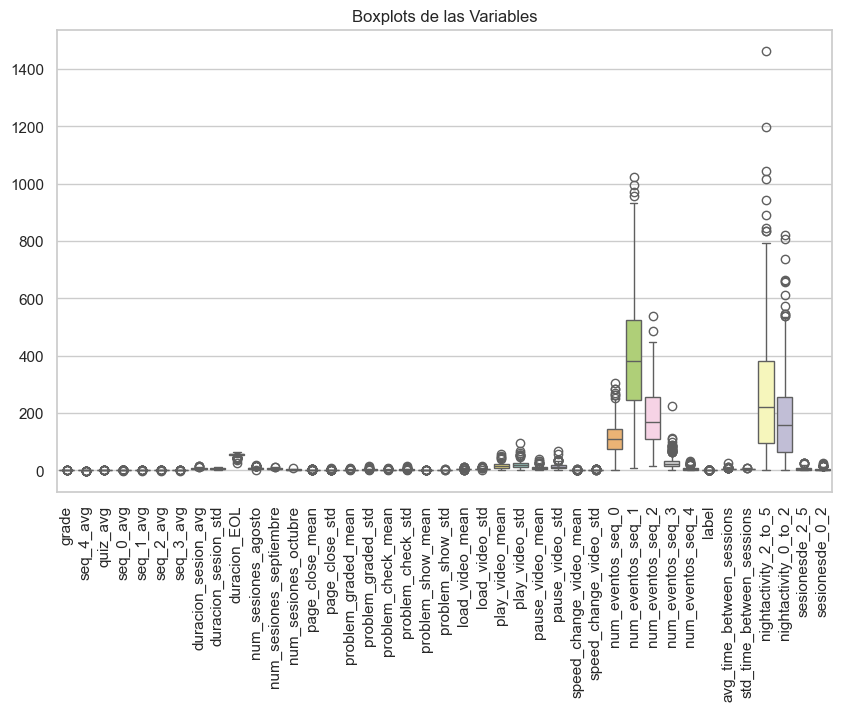

In [33]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear boxplots para cada variable
plt.figure(figsize=(10, 6))
sns.boxplot(data=notas, palette="Set3")
plt.xticks(rotation=90)  
plt.title('Boxplots de las Variables')
plt.show()

# Oversampling

In [33]:
from imblearn.over_sampling import SMOTE

df_entrenamiento = notas.copy()

In [34]:
df_entrenamiento['label'].value_counts()

1    304
0     81
Name: label, dtype: int64

In [35]:
df_entrenamiento.fillna(0, inplace=True)


In [36]:
X = df_entrenamiento.drop(columns=['label', 'username'])
y = df_entrenamiento['label']

# Crear una instancia de SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=314159)

# Aplicar SMOTE a tus datos
X_resampled, y_resampled = smote.fit_resample(X, y)

# X_resampled y y_resampled contienen los datos con SMOTE aplicado

# Puedes convertirlos de nuevo a DataFrames si lo necesitas
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_resampled, name='label')

# Ahora X_resampled_df y y_resampled_df contienen los datos con SMOTE aplicado en formato DataFrame
df_sobremuestreados = pd.concat([X_resampled_df, y_resampled_df], axis=1)

In [37]:
df_sobremuestreados['label'].value_counts()

1    304
0    304
Name: label, dtype: int64

In [38]:
df_entrenamiento = df_sobremuestreados.copy()

# Entrenamiento del modelo

In [39]:
from sklearn.metrics import f1_score
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import random
import optuna
from sklearn.metrics import accuracy_score
seed = 314159
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

c:\Users\tomas\anaconda3\envs\Lab_6\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [40]:
df_entrenamiento.columns

Index(['grade', 'seq_4_avg', 'quiz_avg', 'seq_0_avg', 'seq_1_avg', 'seq_2_avg',
       'seq_3_avg', 'duracion_sesion_avg', 'duracion_sesion_std',
       'duracion_EOL', 'num_sesiones_agosto', 'num_sesiones_septiembre',
       'num_sesiones_octubre', 'page_close_mean', 'page_close_std',
       'problem_graded_mean', 'problem_graded_std', 'problem_check_mean',
       'problem_check_std', 'problem_show_mean', 'problem_show_std',
       'load_video_mean', 'load_video_std', 'play_video_mean',
       'play_video_std', 'pause_video_mean', 'pause_video_std',
       'speed_change_video_mean', 'speed_change_video_std',
       'num_eventos_seq_0', 'num_eventos_seq_1', 'num_eventos_seq_2',
       'num_eventos_seq_3', 'num_eventos_seq_4', 'avg_time_between_sessions',
       'std_time_between_sessions', 'nightactivity_2_to_5',
       'nightactivity_0_to_2', 'sesionesde_2_5', 'sesionesde_0_2', 'label'],
      dtype='object')

En esta parte del código se seleccionan aquellas columnas que tienen una correlación con label mayor a 0.05

In [41]:
# Calcular la correlación entre todas las características y la etiqueta
correlation_matrix = df_entrenamiento.corr()
correlation_with_label = correlation_matrix['label'].abs()

# Seleccionar las características con mayor correlación
selected_features = correlation_with_label[correlation_with_label > 0.05].index.tolist()

# Crear un nuevo DataFrame con solo las características seleccionadas y la etiqueta
selected_data = df_entrenamiento[selected_features]

In [42]:
X = selected_data.drop(columns=['label'])  # Características


y = selected_data['label']  # Etiquetas

Se separan los datos en entrenamiento y testeo. Cabe recalcar que se toma stratify = y. Esto ayuda a que se mantengan balanceadas las clases en ambos datasets.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=314159, stratify=y)


Ahora se escalan todos aquellos datos que no se encuentren entre 0 y 1 con MinMaxScaler.

In [44]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Selecciona las columnas que deben ser escaladas
cols_to_scale = X_train.select_dtypes(include=['float64', 'int64', 'int32']).columns

# Ajusta el scaler con los datos de entrenamiento solo para aquellas columnas que no están en el rango [0, 1]
scaler = MinMaxScaler()
for col in cols_to_scale:
    if X_train[col].min() < 0 or X_train[col].max() > 1:
        X_train[col] = scaler.fit_transform(X_train[[col]])
        # Transforma también los datos de prueba usando el mismo scaler
        X_test[col] = scaler.transform(X_test[[col]])

Se procede al entrenamiento de la red neuronal utilizando tensorflow y optuna. En este sentido, optuna buscará los mejores hiperparámetros para la tasa de aprendizaje, el número de capas, el número de neuronas, el dropout rate, el optimizador, la función de activación y el batch size. Esto se realiza en 200 trials con 50 épocas por red neuronal entrenada.
Posteriormente se toman los parámetros del mejor modelo y se reentrena pero con 200 épocas en vez de 50.

Este código se demora aproximadamente una hora en correr, por lo que se adjunta el modelo en la carpeta.

Se puede cargar ese modelo con el codigo del siguiente chunk

In [47]:

'''
def objective(trial):
    # Definir espacio de búsqueda de hiperparámetros
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-2)
    num_hidden_layers = trial.suggest_int("num_hidden_layers", 1, 8)
    num_hidden_units = trial.suggest_int("num_hidden_units", 16, 512)
    dropout_rate = trial.suggest_float("dropout_rate", 0.0, 0.5)
    optimizer = trial.suggest_categorical("optimizer", ["adam", "sgd", "rmsprop"])
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "sigmoid", "elu"])
    batch_size = trial.suggest_categorical("batch_size", [608//16, 608//32, 608//64])
    
    # Construir el modelo de red neuronal con los hiperparámetros
    model = keras.Sequential()
    for _ in range(num_hidden_layers):
        model.add(keras.layers.Dense(num_hidden_units, activation=activation))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Dropout(dropout_rate))
        
    model.add(keras.layers.Dense(1, activation="sigmoid"))

    # Compilar y entrenar el modelo
    if optimizer == "adam":
        optimizer_obj = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == "sgd":
        optimizer_obj = keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == "rmsprop":
        optimizer_obj = keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Optimizador no soportado")

    model.compile(optimizer=optimizer_obj,
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    
    early_stopping = keras.callbacks.EarlyStopping(
        patience=20,
        min_delta=0.001,
        restore_best_weights=True,
    )
    
    model.fit(X_train, y_train, epochs=50, batch_size=batch_size, verbose=0, validation_data=(X_test, y_test), callbacks=[early_stopping])

    # Evaluar el modelo
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    
    # Calcular el puntaje F1
    f1 = f1_score(y_test, y_pred)

    
    # Almacenar los pesos del modelo como un atributo del ensayo de Optuna
    trial.set_user_attr("model_weights", model.get_weights())
    
    # Guardar el modelo en los atributos de usuario del mejor intento
    trial.set_user_attr('model', model)

    return f1

# Crear un estudio Optuna

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200)

# Obtener el mejor conjunto de hiperparámetros
best_params = study.best_params
print("Mejor conjunto de hiperparámetros:", best_params)

# Después de la optimización, antes de guardar el objeto Study
best_model = study.best_trial.user_attrs.get('model')
'''

c:\Users\tomas\anaconda3\envs\Lab_6\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

[I 2023-12-03 10:29:12,303] A new study created in memory with name: no-name-c9918d84-db75-4896-be51-18700dce0f75


4/4 [==============================] - 0s 2ms/step


[I 2023-12-03 10:29:36,853] Trial 0 finished with value: 0.7692307692307693 and parameters: {'learning_rate': 0.006017707488824367, 'num_hidden_layers': 2, 'num_hidden_units': 329, 'dropout_rate': 0.21056273996850217, 'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 9}. Best is trial 0 with value: 0.7692307692307693.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:30:00,209] Trial 1 finished with value: 0.6986301369863014 and parameters: {'learning_rate': 0.006994460242314335, 'num_hidden_layers': 2, 'num_hidden_units': 307, 'dropout_rate': 0.007947683545153406, 'optimizer': 'rmsprop', 'activation': 'elu', 'batch_size': 9}. Best is trial 0 with value: 0.7692307692307693.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:30:31,189] Trial 2 finished with value: 0.6799999999999999 and parameters: {'learning_rate': 0.008128162590868477, 'num_hidden_layers': 8, 'num_hidden_units': 154, 'dropout_rate': 0.29946119870233456, 'optimizer': 'adam', 'activation': 'elu', 'batch_size': 19}. Best is trial 0 with value: 0.7692307692307693.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 10:30:51,608] Trial 3 finished with value: 0.6629213483146068 and parameters: {'learning_rate': 0.009316904697130994, 'num_hidden_layers': 2, 'num_hidden_units': 70, 'dropout_rate': 0.461259390725649, 'optimizer': 'adam', 'activation': 'relu', 'batch_size': 9}. Best is trial 0 with value: 0.7692307692307693.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 10:31:31,590] Trial 4 finished with value: 0.7218045112781954 and parameters: {'learning_rate': 0.007215148285610208, 'num_hidden_layers': 7, 'num_hidden_units': 465, 'dropout_rate': 0.21275018439087484, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 19}. Best is trial 0 with value: 0.7692307692307693.


4/4 [==============================] - 0s 7ms/step


[I 2023-12-03 10:31:58,446] Trial 5 finished with value: 0.7692307692307692 and parameters: {'learning_rate': 0.0033550945582446973, 'num_hidden_layers': 5, 'num_hidden_units': 485, 'dropout_rate': 0.19658359541128706, 'optimizer': 'adam', 'activation': 'relu', 'batch_size': 19}. Best is trial 0 with value: 0.7692307692307693.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 10:32:21,008] Trial 6 finished with value: 0.2702702702702703 and parameters: {'learning_rate': 0.004482303691749502, 'num_hidden_layers': 8, 'num_hidden_units': 71, 'dropout_rate': 0.44082712075771074, 'optimizer': 'sgd', 'activation': 'elu', 'batch_size': 19}. Best is trial 0 with value: 0.7692307692307693.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 10:32:33,765] Trial 7 finished with value: 0.7716535433070867 and parameters: {'learning_rate': 0.009694661719069077, 'num_hidden_layers': 2, 'num_hidden_units': 31, 'dropout_rate': 0.49195881157949856, 'optimizer': 'rmsprop', 'activation': 'sigmoid', 'batch_size': 19}. Best is trial 7 with value: 0.7716535433070867.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:32:48,983] Trial 8 finished with value: 0.7413793103448276 and parameters: {'learning_rate': 0.0063783620514608124, 'num_hidden_layers': 3, 'num_hidden_units': 306, 'dropout_rate': 0.0481638673939736, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 38}. Best is trial 7 with value: 0.7716535433070867.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 10:33:12,293] Trial 9 finished with value: 0.7272727272727273 and parameters: {'learning_rate': 0.008929265626769206, 'num_hidden_layers': 4, 'num_hidden_units': 111, 'dropout_rate': 0.39493600728057815, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 7 with value: 0.7716535433070867.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:33:23,263] Trial 10 finished with value: 0.7008547008547008 and parameters: {'learning_rate': 0.001500161316551285, 'num_hidden_layers': 1, 'num_hidden_units': 210, 'dropout_rate': 0.3622234606324287, 'optimizer': 'rmsprop', 'activation': 'sigmoid', 'batch_size': 38}. Best is trial 7 with value: 0.7716535433070867.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 10:33:41,296] Trial 11 finished with value: 0.6986301369863014 and parameters: {'learning_rate': 0.009746799067929133, 'num_hidden_layers': 1, 'num_hidden_units': 371, 'dropout_rate': 0.49890332020772504, 'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 9}. Best is trial 7 with value: 0.7716535433070867.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:34:07,762] Trial 12 finished with value: 0.7702702702702702 and parameters: {'learning_rate': 0.005416837125508627, 'num_hidden_layers': 5, 'num_hidden_units': 246, 'dropout_rate': 0.28813440777914523, 'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 19}. Best is trial 7 with value: 0.7716535433070867.


4/4 [==============================] - 0s 2ms/step


[I 2023-12-03 10:34:25,495] Trial 13 finished with value: 0.631578947368421 and parameters: {'learning_rate': 0.004953579975737702, 'num_hidden_layers': 5, 'num_hidden_units': 17, 'dropout_rate': 0.3251833872385691, 'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 19}. Best is trial 7 with value: 0.7716535433070867.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:34:50,182] Trial 14 finished with value: 0.6341463414634146 and parameters: {'learning_rate': 0.007995440888098747, 'num_hidden_layers': 6, 'num_hidden_units': 173, 'dropout_rate': 0.41252357984475757, 'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 19}. Best is trial 7 with value: 0.7716535433070867.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:35:13,011] Trial 15 finished with value: 0.7500000000000001 and parameters: {'learning_rate': 0.0034045022449572457, 'num_hidden_layers': 4, 'num_hidden_units': 234, 'dropout_rate': 0.29773071014798075, 'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 19}. Best is trial 7 with value: 0.7716535433070867.


4/4 [==============================] - 0s 7ms/step


[I 2023-12-03 10:35:26,899] Trial 16 finished with value: 0.6086956521739131 and parameters: {'learning_rate': 0.008348662862355442, 'num_hidden_layers': 6, 'num_hidden_units': 433, 'dropout_rate': 0.3684636517398581, 'optimizer': 'rmsprop', 'activation': 'sigmoid', 'batch_size': 38}. Best is trial 7 with value: 0.7716535433070867.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:35:50,052] Trial 17 finished with value: 0.7289719626168225 and parameters: {'learning_rate': 0.009707137440705022, 'num_hidden_layers': 3, 'num_hidden_units': 391, 'dropout_rate': 0.4714422401718964, 'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 19}. Best is trial 7 with value: 0.7716535433070867.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:36:19,001] Trial 18 finished with value: 0.6917293233082706 and parameters: {'learning_rate': 0.005972471070929275, 'num_hidden_layers': 6, 'num_hidden_units': 265, 'dropout_rate': 0.4226588975292356, 'optimizer': 'rmsprop', 'activation': 'sigmoid', 'batch_size': 19}. Best is trial 7 with value: 0.7716535433070867.


4/4 [==============================] - 0s 7ms/step


[I 2023-12-03 10:36:41,301] Trial 19 finished with value: 0.672566371681416 and parameters: {'learning_rate': 0.007332303522780076, 'num_hidden_layers': 3, 'num_hidden_units': 22, 'dropout_rate': 0.4849082514685849, 'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 19}. Best is trial 7 with value: 0.7716535433070867.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 10:37:03,845] Trial 20 finished with value: 0.6470588235294118 and parameters: {'learning_rate': 0.0002839221755725572, 'num_hidden_layers': 4, 'num_hidden_units': 143, 'dropout_rate': 0.2599334734152501, 'optimizer': 'adam', 'activation': 'sigmoid', 'batch_size': 38}. Best is trial 7 with value: 0.7716535433070867.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 10:37:27,836] Trial 21 finished with value: 0.7540983606557377 and parameters: {'learning_rate': 0.006112442586535197, 'num_hidden_layers': 2, 'num_hidden_units': 341, 'dropout_rate': 0.17792088254241453, 'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 9}. Best is trial 7 with value: 0.7716535433070867.


4/4 [==============================] - 0s 6ms/step


[I 2023-12-03 10:37:50,961] Trial 22 finished with value: 0.7152317880794702 and parameters: {'learning_rate': 0.00874059082587816, 'num_hidden_layers': 1, 'num_hidden_units': 418, 'dropout_rate': 0.12978450723241675, 'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 9}. Best is trial 7 with value: 0.7716535433070867.


4/4 [==============================] - 0s 7ms/step


[I 2023-12-03 10:38:28,278] Trial 23 finished with value: 0.6799999999999999 and parameters: {'learning_rate': 0.009991709957415587, 'num_hidden_layers': 3, 'num_hidden_units': 273, 'dropout_rate': 0.2549923770351841, 'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 9}. Best is trial 7 with value: 0.7716535433070867.


4/4 [==============================] - 0s 6ms/step


[I 2023-12-03 10:38:51,137] Trial 24 finished with value: 0.6811594202898551 and parameters: {'learning_rate': 0.005886631361571085, 'num_hidden_layers': 2, 'num_hidden_units': 223, 'dropout_rate': 0.36426414947061525, 'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 19}. Best is trial 7 with value: 0.7716535433070867.


4/4 [==============================] - 1s 9ms/step


[I 2023-12-03 10:39:41,406] Trial 25 finished with value: 0.7272727272727273 and parameters: {'learning_rate': 0.005228560730305301, 'num_hidden_layers': 5, 'num_hidden_units': 330, 'dropout_rate': 0.32079152166974423, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 7 with value: 0.7716535433070867.


4/4 [==============================] - 0s 7ms/step


[I 2023-12-03 10:40:11,182] Trial 26 finished with value: 0.7368421052631579 and parameters: {'learning_rate': 0.007443995705326402, 'num_hidden_layers': 4, 'num_hidden_units': 184, 'dropout_rate': 0.14540952849736422, 'optimizer': 'rmsprop', 'activation': 'sigmoid', 'batch_size': 19}. Best is trial 7 with value: 0.7716535433070867.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 10:40:31,413] Trial 27 finished with value: 0.7261146496815287 and parameters: {'learning_rate': 0.0067184319367543125, 'num_hidden_layers': 2, 'num_hidden_units': 67, 'dropout_rate': 0.24677360033699122, 'optimizer': 'rmsprop', 'activation': 'elu', 'batch_size': 19}. Best is trial 7 with value: 0.7716535433070867.


4/4 [==============================] - 1s 13ms/step


[I 2023-12-03 10:41:13,080] Trial 28 finished with value: 0.6495726495726496 and parameters: {'learning_rate': 0.007879410627908465, 'num_hidden_layers': 7, 'num_hidden_units': 366, 'dropout_rate': 0.44561108726400106, 'optimizer': 'adam', 'activation': 'sigmoid', 'batch_size': 38}. Best is trial 7 with value: 0.7716535433070867.


4/4 [==============================] - 0s 6ms/step


[I 2023-12-03 10:41:38,294] Trial 29 finished with value: 0.7205882352941175 and parameters: {'learning_rate': 0.008978103298084406, 'num_hidden_layers': 1, 'num_hidden_units': 299, 'dropout_rate': 0.40126699469661925, 'optimizer': 'sgd', 'activation': 'elu', 'batch_size': 9}. Best is trial 7 with value: 0.7716535433070867.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 10:42:13,896] Trial 30 finished with value: 0.743801652892562 and parameters: {'learning_rate': 0.00681299242822469, 'num_hidden_layers': 2, 'num_hidden_units': 511, 'dropout_rate': 0.49223507559040863, 'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 9}. Best is trial 7 with value: 0.7716535433070867.


4/4 [==============================] - 0s 7ms/step


[I 2023-12-03 10:42:44,861] Trial 31 finished with value: 0.6950354609929078 and parameters: {'learning_rate': 0.0038078454231727232, 'num_hidden_layers': 5, 'num_hidden_units': 497, 'dropout_rate': 0.2092654872828531, 'optimizer': 'adam', 'activation': 'relu', 'batch_size': 19}. Best is trial 7 with value: 0.7716535433070867.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 10:43:16,352] Trial 32 finished with value: 0.7341772151898734 and parameters: {'learning_rate': 0.0032704694734477986, 'num_hidden_layers': 5, 'num_hidden_units': 438, 'dropout_rate': 0.293827293409038, 'optimizer': 'adam', 'activation': 'relu', 'batch_size': 19}. Best is trial 7 with value: 0.7716535433070867.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:43:45,914] Trial 33 finished with value: 0.7519999999999999 and parameters: {'learning_rate': 0.005273132752504006, 'num_hidden_layers': 6, 'num_hidden_units': 396, 'dropout_rate': 0.2192524000301046, 'optimizer': 'adam', 'activation': 'relu', 'batch_size': 19}. Best is trial 7 with value: 0.7716535433070867.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 10:43:58,997] Trial 34 finished with value: 0.8034188034188035 and parameters: {'learning_rate': 0.0027621464996600838, 'num_hidden_layers': 3, 'num_hidden_units': 460, 'dropout_rate': 0.17052691797776098, 'optimizer': 'adam', 'activation': 'relu', 'batch_size': 19}. Best is trial 34 with value: 0.8034188034188035.


4/4 [==============================] - 0s 2ms/step


[I 2023-12-03 10:44:09,568] Trial 35 finished with value: 0.7413793103448276 and parameters: {'learning_rate': 0.007737310308521734, 'num_hidden_layers': 3, 'num_hidden_units': 460, 'dropout_rate': 0.15165285812708335, 'optimizer': 'adam', 'activation': 'relu', 'batch_size': 19}. Best is trial 34 with value: 0.8034188034188035.


4/4 [==============================] - 0s 2ms/step


[I 2023-12-03 10:44:15,310] Trial 36 finished with value: 0.7164179104477612 and parameters: {'learning_rate': 0.008435880771415279, 'num_hidden_layers': 2, 'num_hidden_units': 124, 'dropout_rate': 0.11339117372169971, 'optimizer': 'adam', 'activation': 'elu', 'batch_size': 19}. Best is trial 34 with value: 0.8034188034188035.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 10:44:22,797] Trial 37 finished with value: 0.782608695652174 and parameters: {'learning_rate': 0.007056515068138088, 'num_hidden_layers': 3, 'num_hidden_units': 244, 'dropout_rate': 0.17221549049020474, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 34 with value: 0.8034188034188035.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 10:44:30,171] Trial 38 finished with value: 0.8070175438596491 and parameters: {'learning_rate': 0.00919593864620116, 'num_hidden_layers': 3, 'num_hidden_units': 236, 'dropout_rate': 0.17865331122539485, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 38 with value: 0.8070175438596491.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 10:44:44,304] Trial 39 finished with value: 0.8205128205128205 and parameters: {'learning_rate': 0.009283029944959297, 'num_hidden_layers': 3, 'num_hidden_units': 196, 'dropout_rate': 0.1777723785100351, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 39 with value: 0.8205128205128205.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 10:44:57,687] Trial 40 finished with value: 0.8108108108108109 and parameters: {'learning_rate': 0.009216012487349021, 'num_hidden_layers': 3, 'num_hidden_units': 190, 'dropout_rate': 0.17862570174331913, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 39 with value: 0.8205128205128205.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 10:45:11,422] Trial 41 finished with value: 0.7962962962962963 and parameters: {'learning_rate': 0.009090715265332639, 'num_hidden_layers': 3, 'num_hidden_units': 197, 'dropout_rate': 0.10237765310338526, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 39 with value: 0.8205128205128205.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:45:25,820] Trial 42 finished with value: 0.8403361344537814 and parameters: {'learning_rate': 0.00916851126800178, 'num_hidden_layers': 3, 'num_hidden_units': 198, 'dropout_rate': 0.10136510180541769, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 42 with value: 0.8403361344537814.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 10:45:35,070] Trial 43 finished with value: 0.7927927927927928 and parameters: {'learning_rate': 0.009315170387249402, 'num_hidden_layers': 4, 'num_hidden_units': 148, 'dropout_rate': 0.08451554090992845, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 42 with value: 0.8403361344537814.


4/4 [==============================] - 0s 2ms/step


[I 2023-12-03 10:45:42,685] Trial 44 finished with value: 0.8245614035087719 and parameters: {'learning_rate': 0.008497025521019408, 'num_hidden_layers': 3, 'num_hidden_units': 174, 'dropout_rate': 0.18058555202205434, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 42 with value: 0.8403361344537814.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 10:45:51,041] Trial 45 finished with value: 0.7586206896551724 and parameters: {'learning_rate': 0.008600073726407911, 'num_hidden_layers': 4, 'num_hidden_units': 177, 'dropout_rate': 0.19262365871019957, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 42 with value: 0.8403361344537814.


4/4 [==============================] - 0s 1ms/step


[I 2023-12-03 10:45:57,668] Trial 46 finished with value: 0.7796610169491526 and parameters: {'learning_rate': 0.009418234008293055, 'num_hidden_layers': 3, 'num_hidden_units': 114, 'dropout_rate': 0.14533707914990812, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 42 with value: 0.8403361344537814.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:46:05,950] Trial 47 finished with value: 0.8264462809917356 and parameters: {'learning_rate': 0.008210738868832638, 'num_hidden_layers': 4, 'num_hidden_units': 211, 'dropout_rate': 0.04807427802173369, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 42 with value: 0.8403361344537814.


4/4 [==============================] - 0s 2ms/step


[I 2023-12-03 10:46:14,239] Trial 48 finished with value: 0.823529411764706 and parameters: {'learning_rate': 0.008171695114116074, 'num_hidden_layers': 4, 'num_hidden_units': 207, 'dropout_rate': 0.013110145782434274, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 42 with value: 0.8403361344537814.


4/4 [==============================] - 0s 2ms/step


[I 2023-12-03 10:46:19,952] Trial 49 finished with value: 0.7850467289719626 and parameters: {'learning_rate': 0.008185007997336085, 'num_hidden_layers': 4, 'num_hidden_units': 89, 'dropout_rate': 0.027805020488732738, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 38}. Best is trial 42 with value: 0.8403361344537814.


4/4 [==============================] - 0s 2ms/step


[I 2023-12-03 10:46:27,741] Trial 50 finished with value: 0.7850467289719626 and parameters: {'learning_rate': 0.00858007302708551, 'num_hidden_layers': 4, 'num_hidden_units': 163, 'dropout_rate': 0.0628037398236252, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 42 with value: 0.8403361344537814.


4/4 [==============================] - 0s 2ms/step


[I 2023-12-03 10:46:35,928] Trial 51 finished with value: 0.8448275862068965 and parameters: {'learning_rate': 0.008768364507890992, 'num_hidden_layers': 4, 'num_hidden_units': 203, 'dropout_rate': 0.011864117080785063, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 51 with value: 0.8448275862068965.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 10:46:44,475] Trial 52 finished with value: 0.8 and parameters: {'learning_rate': 0.008124449135006453, 'num_hidden_layers': 4, 'num_hidden_units': 202, 'dropout_rate': 0.02188243127719878, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 51 with value: 0.8448275862068965.


4/4 [==============================] - 0s 2ms/step


[I 2023-12-03 10:46:54,686] Trial 53 finished with value: 0.8245614035087719 and parameters: {'learning_rate': 0.008750138402505511, 'num_hidden_layers': 4, 'num_hidden_units': 287, 'dropout_rate': 0.00046079263551820904, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 51 with value: 0.8448275862068965.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 10:47:07,536] Trial 54 finished with value: 0.864406779661017 and parameters: {'learning_rate': 0.007687154181699977, 'num_hidden_layers': 4, 'num_hidden_units': 276, 'dropout_rate': 0.004023668416640002, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 54 with value: 0.864406779661017.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 10:47:19,351] Trial 55 finished with value: 0.7663551401869158 and parameters: {'learning_rate': 0.008772191945749557, 'num_hidden_layers': 5, 'num_hidden_units': 283, 'dropout_rate': 0.043132777263515505, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 54 with value: 0.864406779661017.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 10:47:29,301] Trial 56 finished with value: 0.8727272727272727 and parameters: {'learning_rate': 0.007598738012519626, 'num_hidden_layers': 4, 'num_hidden_units': 298, 'dropout_rate': 0.00672747947547965, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 56 with value: 0.8727272727272727.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:47:40,183] Trial 57 finished with value: 0.864406779661017 and parameters: {'learning_rate': 0.007727869161271066, 'num_hidden_layers': 5, 'num_hidden_units': 255, 'dropout_rate': 0.0005896088006173902, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 56 with value: 0.8727272727272727.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 10:47:48,346] Trial 58 finished with value: 0.822429906542056 and parameters: {'learning_rate': 0.007580249887083142, 'num_hidden_layers': 5, 'num_hidden_units': 247, 'dropout_rate': 0.004817618329532307, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 38}. Best is trial 56 with value: 0.8727272727272727.


4/4 [==============================] - 0s 2ms/step


[I 2023-12-03 10:47:58,673] Trial 59 finished with value: 0.8771929824561403 and parameters: {'learning_rate': 0.007295813334415077, 'num_hidden_layers': 5, 'num_hidden_units': 312, 'dropout_rate': 0.03246054212912508, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 59 with value: 0.8771929824561403.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 10:48:10,889] Trial 60 finished with value: 0.8688524590163934 and parameters: {'learning_rate': 0.007132079546662979, 'num_hidden_layers': 6, 'num_hidden_units': 316, 'dropout_rate': 0.033721001710787436, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 59 with value: 0.8771929824561403.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 10:48:27,531] Trial 61 finished with value: 0.8245614035087719 and parameters: {'learning_rate': 0.00739739723705608, 'num_hidden_layers': 6, 'num_hidden_units': 318, 'dropout_rate': 0.03333369542881746, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 59 with value: 0.8771929824561403.


4/4 [==============================] - 0s 6ms/step


[I 2023-12-03 10:48:54,672] Trial 62 finished with value: 0.7961165048543689 and parameters: {'learning_rate': 0.007751674405788374, 'num_hidden_layers': 7, 'num_hidden_units': 348, 'dropout_rate': 0.0649522004762056, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 59 with value: 0.8771929824561403.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:49:16,083] Trial 63 finished with value: 0.8288288288288288 and parameters: {'learning_rate': 0.007096543065275659, 'num_hidden_layers': 5, 'num_hidden_units': 260, 'dropout_rate': 0.020563458300743027, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 59 with value: 0.8771929824561403.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:49:37,855] Trial 64 finished with value: 0.8318584070796459 and parameters: {'learning_rate': 0.00665130294450332, 'num_hidden_layers': 6, 'num_hidden_units': 310, 'dropout_rate': 0.0003692793051901216, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 59 with value: 0.8771929824561403.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 10:49:49,378] Trial 65 finished with value: 0.8376068376068376 and parameters: {'learning_rate': 0.00788899840493295, 'num_hidden_layers': 5, 'num_hidden_units': 259, 'dropout_rate': 0.03499182248960072, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 59 with value: 0.8771929824561403.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:49:58,276] Trial 66 finished with value: 0.6571428571428571 and parameters: {'learning_rate': 0.007232653005131283, 'num_hidden_layers': 6, 'num_hidden_units': 285, 'dropout_rate': 0.015624037781169872, 'optimizer': 'sgd', 'activation': 'elu', 'batch_size': 19}. Best is trial 59 with value: 0.8771929824561403.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 10:50:09,318] Trial 67 finished with value: 0.8245614035087719 and parameters: {'learning_rate': 0.007620042530726945, 'num_hidden_layers': 5, 'num_hidden_units': 224, 'dropout_rate': 0.05926994518322447, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 59 with value: 0.8771929824561403.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 10:50:20,921] Trial 68 finished with value: 0.7962962962962963 and parameters: {'learning_rate': 0.006531209138324239, 'num_hidden_layers': 5, 'num_hidden_units': 331, 'dropout_rate': 0.027673536366139184, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 38}. Best is trial 59 with value: 0.8771929824561403.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 10:50:37,820] Trial 69 finished with value: 0.8947368421052632 and parameters: {'learning_rate': 0.006307081982596653, 'num_hidden_layers': 8, 'num_hidden_units': 346, 'dropout_rate': 0.04986643115094616, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:50:53,103] Trial 70 finished with value: 0.7889908256880733 and parameters: {'learning_rate': 0.006303540584447883, 'num_hidden_layers': 8, 'num_hidden_units': 356, 'dropout_rate': 0.04503164010155221, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:51:06,804] Trial 71 finished with value: 0.8571428571428572 and parameters: {'learning_rate': 0.0069542218643464, 'num_hidden_layers': 8, 'num_hidden_units': 303, 'dropout_rate': 0.014462517216036992, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:51:23,198] Trial 72 finished with value: 0.8717948717948717 and parameters: {'learning_rate': 0.006923940344550155, 'num_hidden_layers': 8, 'num_hidden_units': 383, 'dropout_rate': 0.016789103109383953, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 10:51:39,528] Trial 73 finished with value: 0.8620689655172413 and parameters: {'learning_rate': 0.006915160727107122, 'num_hidden_layers': 8, 'num_hidden_units': 383, 'dropout_rate': 0.03430512503329418, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:51:54,059] Trial 74 finished with value: 0.8073394495412843 and parameters: {'learning_rate': 0.006875088703977817, 'num_hidden_layers': 7, 'num_hidden_units': 378, 'dropout_rate': 0.07204954390650059, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:52:16,673] Trial 75 finished with value: 0.8288288288288288 and parameters: {'learning_rate': 0.007292300752918538, 'num_hidden_layers': 8, 'num_hidden_units': 404, 'dropout_rate': 0.03803367004612962, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 10:52:26,319] Trial 76 finished with value: 0.6493506493506493 and parameters: {'learning_rate': 0.0063657321892834455, 'num_hidden_layers': 8, 'num_hidden_units': 380, 'dropout_rate': 0.04994609674607199, 'optimizer': 'sgd', 'activation': 'elu', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 10:52:39,115] Trial 77 finished with value: 0.8468468468468469 and parameters: {'learning_rate': 0.005790990757633459, 'num_hidden_layers': 7, 'num_hidden_units': 338, 'dropout_rate': 0.0006749374397484673, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 10:52:57,051] Trial 78 finished with value: 0.8672566371681416 and parameters: {'learning_rate': 0.007489094139992666, 'num_hidden_layers': 8, 'num_hidden_units': 359, 'dropout_rate': 0.0765097593852073, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:53:12,819] Trial 79 finished with value: 0.8448275862068965 and parameters: {'learning_rate': 0.007710485717719971, 'num_hidden_layers': 7, 'num_hidden_units': 356, 'dropout_rate': 0.08286523499170144, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:53:26,096] Trial 80 finished with value: 0.8596491228070176 and parameters: {'learning_rate': 0.007200885694221919, 'num_hidden_layers': 8, 'num_hidden_units': 318, 'dropout_rate': 0.05439282285300613, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 10:53:43,164] Trial 81 finished with value: 0.8547008547008548 and parameters: {'learning_rate': 0.006733994220423504, 'num_hidden_layers': 8, 'num_hidden_units': 368, 'dropout_rate': 0.028792790517274593, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 10:54:01,296] Trial 82 finished with value: 0.7818181818181819 and parameters: {'learning_rate': 0.007447691221636081, 'num_hidden_layers': 8, 'num_hidden_units': 414, 'dropout_rate': 0.038486804446941955, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:54:14,967] Trial 83 finished with value: 0.8392857142857142 and parameters: {'learning_rate': 0.007869311043690267, 'num_hidden_layers': 7, 'num_hidden_units': 294, 'dropout_rate': 0.02026907569444173, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:54:28,396] Trial 84 finished with value: 0.8275862068965518 and parameters: {'learning_rate': 0.006967650274119508, 'num_hidden_layers': 8, 'num_hidden_units': 272, 'dropout_rate': 0.05224581787848145, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:54:44,116] Trial 85 finished with value: 0.7256637168141593 and parameters: {'learning_rate': 0.00657335559140597, 'num_hidden_layers': 8, 'num_hidden_units': 322, 'dropout_rate': 0.07083203198368693, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:55:03,732] Trial 86 finished with value: 0.8595041322314049 and parameters: {'learning_rate': 0.007445607077957843, 'num_hidden_layers': 8, 'num_hidden_units': 391, 'dropout_rate': 0.027888488964193204, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 10:55:19,918] Trial 87 finished with value: 0.8073394495412843 and parameters: {'learning_rate': 0.007026102060443658, 'num_hidden_layers': 7, 'num_hidden_units': 430, 'dropout_rate': 0.012585142279510058, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 10:55:31,807] Trial 88 finished with value: 0.8363636363636363 and parameters: {'learning_rate': 0.006126727322262799, 'num_hidden_layers': 7, 'num_hidden_units': 352, 'dropout_rate': 0.04071633865329799, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 38}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:55:44,872] Trial 89 finished with value: 0.8037383177570093 and parameters: {'learning_rate': 0.008008584280369881, 'num_hidden_layers': 8, 'num_hidden_units': 331, 'dropout_rate': 0.05538778780483712, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:55:57,793] Trial 90 finished with value: 0.7894736842105263 and parameters: {'learning_rate': 0.0067167600694476295, 'num_hidden_layers': 6, 'num_hidden_units': 310, 'dropout_rate': 0.011397191805291602, 'optimizer': 'sgd', 'activation': 'elu', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 10:56:13,364] Trial 91 finished with value: 0.7999999999999999 and parameters: {'learning_rate': 0.0072068393912768135, 'num_hidden_layers': 8, 'num_hidden_units': 316, 'dropout_rate': 0.05501197731661227, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:56:29,084] Trial 92 finished with value: 0.8288288288288288 and parameters: {'learning_rate': 0.007169083361016515, 'num_hidden_layers': 8, 'num_hidden_units': 382, 'dropout_rate': 0.025823702103524585, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 10:56:45,129] Trial 93 finished with value: 0.7522935779816513 and parameters: {'learning_rate': 0.007560710171046952, 'num_hidden_layers': 8, 'num_hidden_units': 340, 'dropout_rate': 0.07610402448236606, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:57:00,211] Trial 94 finished with value: 0.8392857142857142 and parameters: {'learning_rate': 0.007313379784351833, 'num_hidden_layers': 8, 'num_hidden_units': 364, 'dropout_rate': 0.06182582480763047, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:57:13,748] Trial 95 finished with value: 0.6956521739130433 and parameters: {'learning_rate': 0.00831925413141925, 'num_hidden_layers': 8, 'num_hidden_units': 269, 'dropout_rate': 0.04139595246045348, 'optimizer': 'adam', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:57:28,539] Trial 96 finished with value: 0.6211180124223602 and parameters: {'learning_rate': 0.006917044205165747, 'num_hidden_layers': 7, 'num_hidden_units': 302, 'dropout_rate': 0.008507576574274135, 'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:57:39,077] Trial 97 finished with value: 0.8073394495412843 and parameters: {'learning_rate': 0.00785887231729661, 'num_hidden_layers': 5, 'num_hidden_units': 279, 'dropout_rate': 0.08678708572891455, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:57:52,954] Trial 98 finished with value: 0.8318584070796459 and parameters: {'learning_rate': 0.007655344845957889, 'num_hidden_layers': 7, 'num_hidden_units': 321, 'dropout_rate': 0.021456327153986245, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:58:06,131] Trial 99 finished with value: 0.8474576271186439 and parameters: {'learning_rate': 0.006425449286995026, 'num_hidden_layers': 8, 'num_hidden_units': 294, 'dropout_rate': 0.03302240354397723, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 2ms/step


[I 2023-12-03 10:58:15,281] Trial 100 finished with value: 0.7692307692307692 and parameters: {'learning_rate': 0.008038351301338563, 'num_hidden_layers': 4, 'num_hidden_units': 255, 'dropout_rate': 0.00021674448323459605, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 10:58:37,985] Trial 101 finished with value: 0.8739495798319327 and parameters: {'learning_rate': 0.007520451329651969, 'num_hidden_layers': 8, 'num_hidden_units': 395, 'dropout_rate': 0.02435333950395524, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 10:59:02,427] Trial 102 finished with value: 0.7962962962962963 and parameters: {'learning_rate': 0.007510727307619283, 'num_hidden_layers': 8, 'num_hidden_units': 397, 'dropout_rate': 0.048636066499324386, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:59:25,926] Trial 103 finished with value: 0.8141592920353982 and parameters: {'learning_rate': 0.007155066643735604, 'num_hidden_layers': 8, 'num_hidden_units': 410, 'dropout_rate': 0.034033641047239584, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 10:59:43,580] Trial 104 finished with value: 0.8448275862068965 and parameters: {'learning_rate': 0.006824694158261416, 'num_hidden_layers': 8, 'num_hidden_units': 346, 'dropout_rate': 0.015932207514259646, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:00:06,125] Trial 105 finished with value: 0.8448275862068965 and parameters: {'learning_rate': 0.007732606022583047, 'num_hidden_layers': 8, 'num_hidden_units': 424, 'dropout_rate': 0.06155487061826172, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:00:23,114] Trial 106 finished with value: 0.8275862068965518 and parameters: {'learning_rate': 0.007380870636560268, 'num_hidden_layers': 6, 'num_hidden_units': 360, 'dropout_rate': 0.0221042541727856, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 11:00:32,845] Trial 107 finished with value: 0.8108108108108109 and parameters: {'learning_rate': 0.008314462812498133, 'num_hidden_layers': 5, 'num_hidden_units': 374, 'dropout_rate': 0.008021668274315268, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 38}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:00:49,127] Trial 108 finished with value: 0.6222222222222222 and parameters: {'learning_rate': 0.007122676086673691, 'num_hidden_layers': 7, 'num_hidden_units': 325, 'dropout_rate': 0.04627827192439995, 'optimizer': 'adam', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 2ms/step


[I 2023-12-03 11:00:59,158] Trial 109 finished with value: 0.8695652173913043 and parameters: {'learning_rate': 0.007978390629974286, 'num_hidden_layers': 4, 'num_hidden_units': 392, 'dropout_rate': 0.03235163844888093, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:01:10,241] Trial 110 finished with value: 0.7796610169491526 and parameters: {'learning_rate': 0.008024890418858177, 'num_hidden_layers': 4, 'num_hidden_units': 395, 'dropout_rate': 0.033589452029912335, 'optimizer': 'rmsprop', 'activation': 'elu', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:01:23,191] Trial 111 finished with value: 0.8672566371681416 and parameters: {'learning_rate': 0.007529622259494436, 'num_hidden_layers': 4, 'num_hidden_units': 443, 'dropout_rate': 0.02121175046899816, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 11:01:34,902] Trial 112 finished with value: 0.8547008547008548 and parameters: {'learning_rate': 0.007503072470505834, 'num_hidden_layers': 4, 'num_hidden_units': 449, 'dropout_rate': 0.009996574395872638, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 11:01:46,691] Trial 113 finished with value: 0.8256880733944955 and parameters: {'learning_rate': 0.007857851565271497, 'num_hidden_layers': 4, 'num_hidden_units': 474, 'dropout_rate': 0.023073933852799967, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 11:01:57,967] Trial 114 finished with value: 0.7962962962962963 and parameters: {'learning_rate': 0.006874397792408826, 'num_hidden_layers': 4, 'num_hidden_units': 385, 'dropout_rate': 0.040878546857098116, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:02:10,163] Trial 115 finished with value: 0.8495575221238939 and parameters: {'learning_rate': 0.007668345734365875, 'num_hidden_layers': 4, 'num_hidden_units': 445, 'dropout_rate': 0.01644976943559396, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 11:02:21,435] Trial 116 finished with value: 0.8467153284671532 and parameters: {'learning_rate': 0.00837712806406251, 'num_hidden_layers': 4, 'num_hidden_units': 408, 'dropout_rate': 0.029365491276122452, 'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:02:33,805] Trial 117 finished with value: 0.8347826086956522 and parameters: {'learning_rate': 0.008106784270907243, 'num_hidden_layers': 5, 'num_hidden_units': 366, 'dropout_rate': 0.0007525237053658288, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 11:02:43,970] Trial 118 finished with value: 0.8073394495412843 and parameters: {'learning_rate': 0.006552084885220336, 'num_hidden_layers': 4, 'num_hidden_units': 334, 'dropout_rate': 0.06548978607488133, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 19}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:03:01,184] Trial 119 finished with value: 0.864406779661017 and parameters: {'learning_rate': 0.007271707319027716, 'num_hidden_layers': 5, 'num_hidden_units': 423, 'dropout_rate': 0.047372746108332746, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:03:19,253] Trial 120 finished with value: 0.8869565217391304 and parameters: {'learning_rate': 0.007344635891143432, 'num_hidden_layers': 5, 'num_hidden_units': 423, 'dropout_rate': 0.04666846334014383, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 11:03:35,783] Trial 121 finished with value: 0.864406779661017 and parameters: {'learning_rate': 0.0073574559667909855, 'num_hidden_layers': 5, 'num_hidden_units': 419, 'dropout_rate': 0.045237079315730636, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 11:03:53,202] Trial 122 finished with value: 0.8717948717948717 and parameters: {'learning_rate': 0.007744815136037916, 'num_hidden_layers': 5, 'num_hidden_units': 431, 'dropout_rate': 0.021681250623411672, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:04:11,435] Trial 123 finished with value: 0.8214285714285715 and parameters: {'learning_rate': 0.007859529410740348, 'num_hidden_layers': 5, 'num_hidden_units': 435, 'dropout_rate': 0.017876767371333282, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 11:04:29,093] Trial 124 finished with value: 0.8288288288288288 and parameters: {'learning_rate': 0.007598540734114232, 'num_hidden_layers': 5, 'num_hidden_units': 452, 'dropout_rate': 0.0070947880798686086, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:04:57,789] Trial 125 finished with value: 0.8363636363636363 and parameters: {'learning_rate': 0.00815759331340525, 'num_hidden_layers': 6, 'num_hidden_units': 400, 'dropout_rate': 0.026188751871008192, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 7ms/step


[I 2023-12-03 11:05:36,419] Trial 126 finished with value: 0.8695652173913043 and parameters: {'learning_rate': 0.007039299530265103, 'num_hidden_layers': 5, 'num_hidden_units': 479, 'dropout_rate': 0.056246002760250484, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:06:10,017] Trial 127 finished with value: 0.8518518518518519 and parameters: {'learning_rate': 0.00703260648958964, 'num_hidden_layers': 4, 'num_hidden_units': 490, 'dropout_rate': 0.07061417898037162, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:06:50,603] Trial 128 finished with value: 0.8521739130434782 and parameters: {'learning_rate': 0.006752239531508858, 'num_hidden_layers': 5, 'num_hidden_units': 471, 'dropout_rate': 0.055766302281813306, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:07:25,017] Trial 129 finished with value: 0.8214285714285715 and parameters: {'learning_rate': 0.007455538430781668, 'num_hidden_layers': 4, 'num_hidden_units': 460, 'dropout_rate': 0.03806477574731311, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 11ms/step


[I 2023-12-03 11:08:08,919] Trial 130 finished with value: 0.8288288288288288 and parameters: {'learning_rate': 0.008522302452144534, 'num_hidden_layers': 6, 'num_hidden_units': 505, 'dropout_rate': 0.0774997725217994, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:08:47,718] Trial 131 finished with value: 0.8571428571428572 and parameters: {'learning_rate': 0.007895274078523556, 'num_hidden_layers': 5, 'num_hidden_units': 442, 'dropout_rate': 0.01633406562703579, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:09:09,085] Trial 132 finished with value: 0.8849557522123893 and parameters: {'learning_rate': 0.007718512293435558, 'num_hidden_layers': 5, 'num_hidden_units': 469, 'dropout_rate': 0.028150576274596446, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:09:30,504] Trial 133 finished with value: 0.8073394495412843 and parameters: {'learning_rate': 0.007081111529152365, 'num_hidden_layers': 5, 'num_hidden_units': 466, 'dropout_rate': 0.09277597695799356, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:09:48,504] Trial 134 finished with value: 0.8666666666666666 and parameters: {'learning_rate': 0.00732462725946733, 'num_hidden_layers': 5, 'num_hidden_units': 480, 'dropout_rate': 0.05624882138482164, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 11:10:07,678] Trial 135 finished with value: 0.7884615384615384 and parameters: {'learning_rate': 0.007318524710144565, 'num_hidden_layers': 5, 'num_hidden_units': 479, 'dropout_rate': 0.0658847876314744, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 11:10:32,748] Trial 136 finished with value: 0.12307692307692307 and parameters: {'learning_rate': 0.006642497412463652, 'num_hidden_layers': 5, 'num_hidden_units': 455, 'dropout_rate': 0.056483176429831805, 'optimizer': 'adam', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:10:49,981] Trial 137 finished with value: 0.7692307692307692 and parameters: {'learning_rate': 0.007493604874676159, 'num_hidden_layers': 5, 'num_hidden_units': 431, 'dropout_rate': 0.07839128977917417, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 11:11:15,915] Trial 138 finished with value: 0.7499999999999999 and parameters: {'learning_rate': 0.006274702909061925, 'num_hidden_layers': 6, 'num_hidden_units': 476, 'dropout_rate': 0.04932132653031821, 'optimizer': 'rmsprop', 'activation': 'relu', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:11:43,779] Trial 139 finished with value: 0.8727272727272727 and parameters: {'learning_rate': 0.007026320083022164, 'num_hidden_layers': 5, 'num_hidden_units': 500, 'dropout_rate': 0.028707649079744345, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 6ms/step


[I 2023-12-03 11:12:01,465] Trial 140 finished with value: 0.8 and parameters: {'learning_rate': 0.006939448715514379, 'num_hidden_layers': 5, 'num_hidden_units': 488, 'dropout_rate': 0.02909459828726458, 'optimizer': 'sgd', 'activation': 'elu', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 6ms/step


[I 2023-12-03 11:12:24,221] Trial 141 finished with value: 0.8672566371681416 and parameters: {'learning_rate': 0.007227984178274443, 'num_hidden_layers': 5, 'num_hidden_units': 506, 'dropout_rate': 0.03984561084121682, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:12:49,234] Trial 142 finished with value: 0.8288288288288288 and parameters: {'learning_rate': 0.007174998041830564, 'num_hidden_layers': 5, 'num_hidden_units': 500, 'dropout_rate': 0.035551774151892764, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:13:12,825] Trial 143 finished with value: 0.8928571428571428 and parameters: {'learning_rate': 0.007615029621257584, 'num_hidden_layers': 5, 'num_hidden_units': 494, 'dropout_rate': 0.02247172794804353, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:13:32,997] Trial 144 finished with value: 0.8495575221238939 and parameters: {'learning_rate': 0.007664802405051223, 'num_hidden_layers': 5, 'num_hidden_units': 491, 'dropout_rate': 0.023553235245873952, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:13:55,980] Trial 145 finished with value: 0.8392857142857142 and parameters: {'learning_rate': 0.00784799094180418, 'num_hidden_layers': 5, 'num_hidden_units': 510, 'dropout_rate': 0.016312487217778372, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:14:13,578] Trial 146 finished with value: 0.8547008547008548 and parameters: {'learning_rate': 0.007503531600704452, 'num_hidden_layers': 4, 'num_hidden_units': 464, 'dropout_rate': 0.02917539321429469, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:14:33,179] Trial 147 finished with value: 0.8141592920353982 and parameters: {'learning_rate': 0.007993880955520328, 'num_hidden_layers': 5, 'num_hidden_units': 410, 'dropout_rate': 0.04411112223090387, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:14:52,715] Trial 148 finished with value: 0.8598130841121495 and parameters: {'learning_rate': 0.006780009043872297, 'num_hidden_layers': 6, 'num_hidden_units': 347, 'dropout_rate': 0.01087748268662872, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:15:10,045] Trial 149 finished with value: 0.8545454545454545 and parameters: {'learning_rate': 0.008221964791268077, 'num_hidden_layers': 4, 'num_hidden_units': 493, 'dropout_rate': 0.06759220496423053, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:15:19,541] Trial 150 finished with value: 0.8468468468468469 and parameters: {'learning_rate': 0.006470535218446792, 'num_hidden_layers': 5, 'num_hidden_units': 442, 'dropout_rate': 0.035027244723314206, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 38}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:15:38,979] Trial 151 finished with value: 0.8421052631578947 and parameters: {'learning_rate': 0.007083882823194625, 'num_hidden_layers': 5, 'num_hidden_units': 508, 'dropout_rate': 0.04157671608535107, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:15:59,059] Trial 152 finished with value: 0.8521739130434782 and parameters: {'learning_rate': 0.007711777901594712, 'num_hidden_layers': 5, 'num_hidden_units': 512, 'dropout_rate': 0.025351071801812022, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:16:18,189] Trial 153 finished with value: 0.8495575221238939 and parameters: {'learning_rate': 0.00724087299925691, 'num_hidden_layers': 5, 'num_hidden_units': 486, 'dropout_rate': 0.051742173491510654, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 6ms/step


[I 2023-12-03 11:16:41,607] Trial 154 finished with value: 0.8695652173913043 and parameters: {'learning_rate': 0.0075279253671474665, 'num_hidden_layers': 5, 'num_hidden_units': 374, 'dropout_rate': 0.04110269568828957, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:17:03,394] Trial 155 finished with value: 0.8108108108108109 and parameters: {'learning_rate': 0.007625690813531959, 'num_hidden_layers': 5, 'num_hidden_units': 386, 'dropout_rate': 0.1109029601943892, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 3ms/step


[I 2023-12-03 11:17:24,763] Trial 156 finished with value: 0.8771929824561403 and parameters: {'learning_rate': 0.008046105651966767, 'num_hidden_layers': 6, 'num_hidden_units': 373, 'dropout_rate': 0.015428818486239919, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:17:46,592] Trial 157 finished with value: 0.8750000000000001 and parameters: {'learning_rate': 0.007992978710139877, 'num_hidden_layers': 6, 'num_hidden_units': 375, 'dropout_rate': 0.010573582502544475, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:18:11,153] Trial 158 finished with value: 0.8392857142857142 and parameters: {'learning_rate': 0.007972639004607611, 'num_hidden_layers': 6, 'num_hidden_units': 371, 'dropout_rate': 0.009547110273871721, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 69 with value: 0.8947368421052632.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:18:30,897] Trial 159 finished with value: 0.9090909090909091 and parameters: {'learning_rate': 0.00838577805415959, 'num_hidden_layers': 6, 'num_hidden_units': 375, 'dropout_rate': 0.007392878523957584, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:18:55,059] Trial 160 finished with value: 0.6229508196721312 and parameters: {'learning_rate': 0.00829266872320905, 'num_hidden_layers': 6, 'num_hidden_units': 375, 'dropout_rate': 0.0008804363362514712, 'optimizer': 'adam', 'activation': 'sigmoid', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:19:16,220] Trial 161 finished with value: 0.8448275862068965 and parameters: {'learning_rate': 0.00800484138694732, 'num_hidden_layers': 6, 'num_hidden_units': 393, 'dropout_rate': 0.01856215732186385, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:19:33,692] Trial 162 finished with value: 0.8695652173913043 and parameters: {'learning_rate': 0.00841955560924824, 'num_hidden_layers': 6, 'num_hidden_units': 356, 'dropout_rate': 0.010629147394949412, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:19:55,072] Trial 163 finished with value: 0.817391304347826 and parameters: {'learning_rate': 0.008377677457755172, 'num_hidden_layers': 6, 'num_hidden_units': 355, 'dropout_rate': 0.0075610765663215495, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:20:13,828] Trial 164 finished with value: 0.8376068376068376 and parameters: {'learning_rate': 0.008529793938262356, 'num_hidden_layers': 6, 'num_hidden_units': 377, 'dropout_rate': 0.024237539418600608, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:20:33,328] Trial 165 finished with value: 0.8076923076923077 and parameters: {'learning_rate': 0.00885729446755632, 'num_hidden_layers': 6, 'num_hidden_units': 403, 'dropout_rate': 0.00857623831463385, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:20:51,353] Trial 166 finished with value: 0.8245614035087719 and parameters: {'learning_rate': 0.008608452174180888, 'num_hidden_layers': 6, 'num_hidden_units': 389, 'dropout_rate': 8.103319153809907e-05, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:21:16,301] Trial 167 finished with value: 0.6614173228346456 and parameters: {'learning_rate': 0.00815451699685761, 'num_hidden_layers': 6, 'num_hidden_units': 366, 'dropout_rate': 0.017154988727800198, 'optimizer': 'rmsprop', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:21:33,666] Trial 168 finished with value: 0.7850467289719626 and parameters: {'learning_rate': 0.007784421933437056, 'num_hidden_layers': 5, 'num_hidden_units': 339, 'dropout_rate': 0.03031213942572219, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:21:53,158] Trial 169 finished with value: 0.8852459016393442 and parameters: {'learning_rate': 0.008146829287817023, 'num_hidden_layers': 5, 'num_hidden_units': 415, 'dropout_rate': 0.03700728358690011, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 14ms/step


[I 2023-12-03 11:22:34,586] Trial 170 finished with value: 0.7652173913043478 and parameters: {'learning_rate': 0.008074350684773404, 'num_hidden_layers': 5, 'num_hidden_units': 422, 'dropout_rate': 0.041603763255491616, 'optimizer': 'sgd', 'activation': 'relu', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:22:58,513] Trial 171 finished with value: 0.7663551401869158 and parameters: {'learning_rate': 0.008426652149151413, 'num_hidden_layers': 5, 'num_hidden_units': 400, 'dropout_rate': 0.015189311915552695, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:23:21,057] Trial 172 finished with value: 0.7735849056603773 and parameters: {'learning_rate': 0.007816850039330737, 'num_hidden_layers': 5, 'num_hidden_units': 381, 'dropout_rate': 0.032518071401647364, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:23:44,408] Trial 173 finished with value: 0.8648648648648649 and parameters: {'learning_rate': 0.008161334680345429, 'num_hidden_layers': 5, 'num_hidden_units': 413, 'dropout_rate': 0.023249699674798518, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 7ms/step


[I 2023-12-03 11:24:06,883] Trial 174 finished with value: 0.8403361344537814 and parameters: {'learning_rate': 0.00890371880602459, 'num_hidden_layers': 5, 'num_hidden_units': 361, 'dropout_rate': 0.04592407666343112, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:24:29,648] Trial 175 finished with value: 0.8376068376068376 and parameters: {'learning_rate': 0.007951241899521864, 'num_hidden_layers': 5, 'num_hidden_units': 390, 'dropout_rate': 0.010661217016945314, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:24:54,776] Trial 176 finished with value: 0.7592592592592592 and parameters: {'learning_rate': 0.00858476147473553, 'num_hidden_layers': 6, 'num_hidden_units': 352, 'dropout_rate': 0.033649350074586866, 'optimizer': 'sgd', 'activation': 'elu', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:25:18,638] Trial 177 finished with value: 0.8256880733944955 and parameters: {'learning_rate': 0.008290690793608791, 'num_hidden_layers': 5, 'num_hidden_units': 368, 'dropout_rate': 0.02318344429042844, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 6ms/step


[I 2023-12-03 11:25:41,024] Trial 178 finished with value: 0.8771929824561403 and parameters: {'learning_rate': 0.007670327251387168, 'num_hidden_layers': 6, 'num_hidden_units': 406, 'dropout_rate': 0.06114996792699716, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 6ms/step


[I 2023-12-03 11:26:03,867] Trial 179 finished with value: 0.8547008547008548 and parameters: {'learning_rate': 0.007471572787254036, 'num_hidden_layers': 5, 'num_hidden_units': 428, 'dropout_rate': 0.05500181895945168, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:26:27,832] Trial 180 finished with value: 0.8545454545454545 and parameters: {'learning_rate': 0.007680175037820714, 'num_hidden_layers': 5, 'num_hidden_units': 401, 'dropout_rate': 0.06603949133265603, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 6ms/step


[I 2023-12-03 11:26:54,214] Trial 181 finished with value: 0.8521739130434782 and parameters: {'learning_rate': 0.007365273533687898, 'num_hidden_layers': 6, 'num_hidden_units': 416, 'dropout_rate': 0.041398227413217185, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:27:17,762] Trial 182 finished with value: 0.7889908256880733 and parameters: {'learning_rate': 0.007795181085249318, 'num_hidden_layers': 6, 'num_hidden_units': 378, 'dropout_rate': 0.15683969197899406, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:27:39,702] Trial 183 finished with value: 0.8392857142857142 and parameters: {'learning_rate': 0.008074458089312087, 'num_hidden_layers': 6, 'num_hidden_units': 389, 'dropout_rate': 0.015150210958897601, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 7ms/step


[I 2023-12-03 11:28:10,677] Trial 184 finished with value: 0.75 and parameters: {'learning_rate': 0.005568257111241146, 'num_hidden_layers': 7, 'num_hidden_units': 403, 'dropout_rate': 0.13414910701687704, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 6ms/step


[I 2023-12-03 11:28:38,348] Trial 185 finished with value: 0.8760330578512396 and parameters: {'learning_rate': 0.007613884018025792, 'num_hidden_layers': 6, 'num_hidden_units': 498, 'dropout_rate': 0.03270076634553313, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 8ms/step


[I 2023-12-03 11:29:19,532] Trial 186 finished with value: 0.8495575221238939 and parameters: {'learning_rate': 0.007414658390457504, 'num_hidden_layers': 6, 'num_hidden_units': 483, 'dropout_rate': 0.05084532552313044, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:29:41,530] Trial 187 finished with value: 0.8596491228070176 and parameters: {'learning_rate': 0.007648558051793971, 'num_hidden_layers': 5, 'num_hidden_units': 498, 'dropout_rate': 0.03282445434948578, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:29:52,508] Trial 188 finished with value: 0.7884615384615384 and parameters: {'learning_rate': 0.006944597586294222, 'num_hidden_layers': 5, 'num_hidden_units': 466, 'dropout_rate': 0.05975148464096948, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 38}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 6ms/step


[I 2023-12-03 11:30:20,166] Trial 189 finished with value: 0.8181818181818182 and parameters: {'learning_rate': 0.007575952164884823, 'num_hidden_layers': 6, 'num_hidden_units': 499, 'dropout_rate': 0.08801691347983509, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:30:40,734] Trial 190 finished with value: 0.7999999999999999 and parameters: {'learning_rate': 0.007357759041980759, 'num_hidden_layers': 5, 'num_hidden_units': 411, 'dropout_rate': 0.026980942466892144, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:31:05,614] Trial 191 finished with value: 0.8256880733944955 and parameters: {'learning_rate': 0.007921760999544546, 'num_hidden_layers': 6, 'num_hidden_units': 374, 'dropout_rate': 0.007643389766172718, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:31:28,816] Trial 192 finished with value: 0.8032786885245902 and parameters: {'learning_rate': 0.008259187495665064, 'num_hidden_layers': 6, 'num_hidden_units': 392, 'dropout_rate': 0.03659454186967076, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:31:42,212] Trial 193 finished with value: 0.7555555555555555 and parameters: {'learning_rate': 0.007799834091048912, 'num_hidden_layers': 6, 'num_hidden_units': 41, 'dropout_rate': 0.018150395433512826, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 4ms/step


[I 2023-12-03 11:32:05,248] Trial 194 finished with value: 0.7272727272727273 and parameters: {'learning_rate': 0.007136099178998031, 'num_hidden_layers': 6, 'num_hidden_units': 353, 'dropout_rate': 0.22515132580778643, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 6ms/step


[I 2023-12-03 11:32:27,491] Trial 195 finished with value: 0.8869565217391304 and parameters: {'learning_rate': 0.008709137327579058, 'num_hidden_layers': 5, 'num_hidden_units': 381, 'dropout_rate': 0.0005121305987773155, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 19ms/step


[I 2023-12-03 11:32:50,461] Trial 196 finished with value: 0.8620689655172413 and parameters: {'learning_rate': 0.006091787784578423, 'num_hidden_layers': 5, 'num_hidden_units': 384, 'dropout_rate': 0.04374822984965334, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 6ms/step


[I 2023-12-03 11:33:11,791] Trial 197 finished with value: 0.6194690265486725 and parameters: {'learning_rate': 0.0066805280133746285, 'num_hidden_layers': 5, 'num_hidden_units': 401, 'dropout_rate': 0.0017220292846743639, 'optimizer': 'adam', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:33:36,699] Trial 198 finished with value: 0.8288288288288288 and parameters: {'learning_rate': 0.007560570321684414, 'num_hidden_layers': 5, 'num_hidden_units': 436, 'dropout_rate': 0.02513056453707138, 'optimizer': 'sgd', 'activation': 'sigmoid', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


4/4 [==============================] - 0s 5ms/step


[I 2023-12-03 11:34:00,877] Trial 199 finished with value: 0.8347826086956522 and parameters: {'learning_rate': 0.004818832659925317, 'num_hidden_layers': 5, 'num_hidden_units': 420, 'dropout_rate': 0.04925155461911075, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}. Best is trial 159 with value: 0.9090909090909091.


Mejor conjunto de hiperparámetros: {'learning_rate': 0.00838577805415959, 'num_hidden_layers': 6, 'num_hidden_units': 375, 'dropout_rate': 0.007392878523957584, 'optimizer': 'sgd', 'activation': 'tanh', 'batch_size': 9}


In [50]:
'''
# Build the model with the best hyperparameters
best_model1 = keras.Sequential()
for _ in range(best_params["num_hidden_layers"]):
    best_model1.add(keras.layers.Dense(best_params["num_hidden_units"], activation=best_params["activation"]))
    best_model1.add(keras.layers.BatchNormalization())
    best_model1.add(keras.layers.Dropout(best_params["dropout_rate"]))

best_model1.add(keras.layers.Dense(1, activation="sigmoid"))

# Compile the model with the best optimizer and learning rate
if best_params["optimizer"] == "adam":
    optimizer_obj = keras.optimizers.Adam(learning_rate=best_params["learning_rate"])
elif best_params["optimizer"] == "sgd":
    optimizer_obj = keras.optimizers.SGD(learning_rate=best_params["learning_rate"])
elif best_params["optimizer"] == "rmsprop":
    optimizer_obj = keras.optimizers.RMSprop(learning_rate=best_params["learning_rate"])
else:
    raise ValueError("Optimizador no soportado")

best_model1.compile(optimizer=optimizer_obj, loss="binary_crossentropy", metrics=["accuracy"])

# Train the model on the entire training dataset
early_stopping = keras.callbacks.EarlyStopping(
    patience=30,
    min_delta=0.001,
    restore_best_weights=True,
)

best_model1.fit(X_train, y_train, epochs=200, batch_size=best_params["batch_size"], verbose=1, callbacks=[early_stopping])

# Evaluate the retrained model
y_pred = (best_model1.predict(X_test) > 0.5).astype(int)
f1 = f1_score(y_test, y_pred)

print("F1 Score on Test Set:", f1)

'''

Epoch 1/200
54/54 [==============================] - 8s 12ms/step - loss: 0.8791 - accuracy: 0.5453
Epoch 2/200
54/54 [==============================] - 1s 11ms/step - loss: 0.6549 - accuracy: 0.6481
Epoch 3/200
54/54 [==============================] - 1s 11ms/step - loss: 0.6129 - accuracy: 0.7016
Epoch 4/200
54/54 [==============================] - 1s 11ms/step - loss: 0.5821 - accuracy: 0.6914
Epoch 5/200
54/54 [==============================] - 1s 11ms/step - loss: 0.5607 - accuracy: 0.7078
Epoch 6/200
54/54 [==============================] - 1s 11ms/step - loss: 0.5043 - accuracy: 0.7510
Epoch 7/200
54/54 [==============================] - 1s 11ms/step - loss: 0.4846 - accuracy: 0.7634
Epoch 8/200
54/54 [==============================] - 1s 11ms/step - loss: 0.4969 - accuracy: 0.7695
Epoch 9/200
54/54 [==============================] - 1s 11ms/step - loss: 0.4186 - accuracy: 0.8189
Epoch 10/200
54/54 [==============================] - 1s 11ms/step - loss: 0.4558 - accuracy: 0.7654

In [45]:
import pickle
'''
# Guardar el modelo
with open('NN_best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model1, model_file)
'''

"\n# Guardar el modelo\nwith open('NN_best_model.pkl', 'wb') as model_file:\n    pickle.dump(best_model1, model_file)\n"

In [46]:
# Cargar el modelo
with open('NN_best_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [47]:
from sklearn.metrics import classification_report

# Se hacen la predicciones sobre los datos de test
predictions = (loaded_model.predict(X_test) > 0.5).astype(int)

# Generar un informe de clasificación
report = classification_report(y_test, predictions)
print("Informe de clasificación:\n", report)

4/4 [==============================] - 0s 4ms/step
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.77      0.93      0.84        61
           1       0.92      0.72      0.81        61

    accuracy                           0.83       122
   macro avg       0.84      0.83      0.83       122
weighted avg       0.84      0.83      0.83       122



Ahora se procede a entrenar el modelo con KNN, Decision Tree, y Stacking.

Del mismo modo que en el modelo anterior, primero se entrenan modelos con optuna, para luego reentrenarlo en función de los mejores hiperparámetros encontrados.

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
'''
def objective(trial):
    # KNN parameters
    knn_n_neighbors = trial.suggest_int('knn_n_neighbors', 1, 50)
    knn_weights = trial.suggest_categorical('knn_weights', ['uniform', 'distance'])
    
    # Decision Tree parameters
    dt_max_depth = trial.suggest_int('dt_max_depth', 1, 10)
    dt_criterion = trial.suggest_categorical('dt_criterion', ['gini', 'entropy'])
    
    # Final estimator (Decision Tree) parameters for Stacking Classifier
    final_dt_max_depth = trial.suggest_int('final_dt_max_depth', 1, 10)
    final_dt_criterion = trial.suggest_categorical('final_dt_criterion', ['gini', 'entropy'])

    # Initialize KNN and Decision Tree classifiers
    knn_model = KNeighborsClassifier(n_neighbors=knn_n_neighbors, weights=knn_weights)
    dt_model = DecisionTreeClassifier(max_depth=dt_max_depth, criterion=dt_criterion)
    final_dt_model = DecisionTreeClassifier(max_depth=final_dt_max_depth, criterion=final_dt_criterion)

    # Stacking Classifier with KNN and Decision Tree as base estimators
    estimators = [('knn', knn_model), ('decision_tree', dt_model)]
    stacking_model = StackingClassifier(estimators=estimators, final_estimator=final_dt_model)
    stacking_model.fit(X_train, y_train)
    
    y_pred = stacking_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=400)

best_params = study.best_params
best_accuracy = study.best_value

print("Best Parameters Found:", best_params)
print("Corresponding Accuracy:", best_accuracy)
'''

[I 2023-12-03 17:13:46,982] A new study created in memory with name: no-name-f232f36f-dcfa-4d92-9686-030df5605306
[I 2023-12-03 17:13:47,177] Trial 0 finished with value: 0.7540983606557377 and parameters: {'knn_n_neighbors': 35, 'knn_weights': 'distance', 'dt_max_depth': 8, 'dt_criterion': 'entropy', 'final_dt_max_depth': 4, 'final_dt_criterion': 'gini'}. Best is trial 0 with value: 0.7540983606557377.
[I 2023-12-03 17:13:47,301] Trial 1 finished with value: 0.639344262295082 and parameters: {'knn_n_neighbors': 38, 'knn_weights': 'uniform', 'dt_max_depth': 4, 'dt_criterion': 'entropy', 'final_dt_max_depth': 8, 'final_dt_criterion': 'gini'}. Best is trial 0 with value: 0.7540983606557377.
[I 2023-12-03 17:13:47,395] Trial 2 finished with value: 0.5573770491803278 and parameters: {'knn_n_neighbors': 22, 'knn_weights': 'uniform', 'dt_max_depth': 2, 'dt_criterion': 'entropy', 'final_dt_max_depth': 10, 'final_dt_criterion': 'entropy'}. Best is trial 0 with value: 0.7540983606557377.
[I 202

Best Parameters Found: {'knn_n_neighbors': 3, 'knn_weights': 'distance', 'dt_max_depth': 9, 'dt_criterion': 'gini', 'final_dt_max_depth': 8, 'final_dt_criterion': 'gini'}
Corresponding Accuracy: 0.8934426229508197


In [74]:
'''
# Entrenar un nuevo modelo con los mejores parámetros encontrados por Optuna
best_knn_n_neighbors = best_params['knn_n_neighbors']
best_knn_weights = best_params['knn_weights']
best_dt_max_depth = best_params['dt_max_depth']
best_dt_criterion = best_params['dt_criterion']
best_final_dt_max_depth = best_params['final_dt_max_depth']
best_final_dt_criterion = best_params['final_dt_criterion']

best_knn_model = KNeighborsClassifier(n_neighbors=best_knn_n_neighbors, weights=best_knn_weights)
best_dt_model = DecisionTreeClassifier(max_depth=best_dt_max_depth, criterion=best_dt_criterion)
best_final_dt_model = DecisionTreeClassifier(max_depth=best_final_dt_max_depth, criterion=best_final_dt_criterion)

best_estimators = [('knn', best_knn_model), ('decision_tree', best_dt_model)]
best_stacking_model = StackingClassifier(estimators=best_estimators, final_estimator=best_final_dt_model)
best_stacking_model.fit(X_train, y_train)
'''

StackingClassifier(estimators=[('knn',
                                KNeighborsClassifier(n_neighbors=3,
                                                     weights='distance')),
                               ('decision_tree',
                                DecisionTreeClassifier(max_depth=9))],
                   final_estimator=DecisionTreeClassifier(max_depth=8))

In [76]:
'''
# Guardar el modelo
with open('best_stacking_model.pkl', 'wb') as model_file:
    pickle.dump(best_stacking_model, model_file)
'''

In [48]:
# Cargar el modelo
with open('best_stacking_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [49]:
# Realizar predicciones en el conjunto de validación
y_pred_val = loaded_model.predict(X_test)

# Obtener el classification report
classification_rep = classification_report(y_test, y_pred_val)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        61
           1       0.91      0.82      0.86        61

    accuracy                           0.87       122
   macro avg       0.87      0.87      0.87       122
weighted avg       0.87      0.87      0.87       122

